In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re

In [2]:
page = requests.get("https://www.zigwheels.com/newbikes/electric-bikes")

In [3]:
page

<Response [200]>

In [4]:
soup = BeautifulSoup(page.text)

In [5]:
p = soup.find_all("a",class_="fnt-14 lnk-hvr block of-hid ht-name")

In [6]:
Brand = []
for i in p:
    Brand.append(i.text.split()[0])

In [7]:
Brand

['Revolt',
 'Ultraviolette',
 'Tork',
 'Oben',
 'Matter',
 'Komaki',
 'Odysse',
 'Kabira',
 'One',
 'Power',
 'Hop',
 'Komaki',
 'Atumobile',
 'Joy',
 'ABZO',
 'Kabira',
 'Atumobile',
 'PURE',
 'Srivaru',
 'PURE',
 'Komaki',
 'Komaki',
 'Rowwet',
 'Komaki',
 'Birla',
 'Odysse',
 'Joy',
 'Joy']

In [8]:
len(Brand)

28

In [9]:
p = soup.find_all("a",class_="fnt-14 lnk-hvr block of-hid ht-name")

In [10]:
Models = []
for i in p:
    Models.append(i.text.split('\n')[1])

In [11]:
Models

['Revolt RV400\t',
 'Ultraviolette F77\t',
 'Tork Kratos R\t',
 'Oben Rorr\t',
 'Matter Aera\t',
 'Komaki Ranger\t',
 'Odysse Electric Evoqis\t',
 'Kabira Mobility KM 3000\t',
 'One Electric Motorcycles Kridn\t',
 'Power EV P-Sport\t',
 'Hop Oxo\t',
 'Komaki XGT CAT 2.0\t',
 'Atumobile Atum Version 1.0\t',
 'Joy e-bike Beast\t',
 'ABZO VS01\t',
 'Kabira Mobility KM 4000\t',
 'Atumobile AtumVader\t',
 'PURE EV eTryst 350\t',
 'Srivaru Motors Prana\t',
 'PURE EV EcoDryft\t',
 'Komaki MX3\t',
 'Komaki XGT Classic\t',
 'Rowwet Trono\t',
 'Komaki DT 3000\t',
 'Birla V6\t',
 'Odysse Electric VADER\t',
 'Joy e-bike Monster\t',
 'Joy e-bike Thunderbolt\t']

In [12]:
len(Models)

28

In [13]:
Ranges = []
for i in soup.find_all("div",class_="clr-try fnt-12 pb-10 ht-spec of-hid"):
        a =i.text
        b = re.findall(r"(\d+)\skm/charge",str(a))
        if b:
            Ranges.append(b[0])

In [14]:
Ranges

['150',
 '307',
 '180',
 '200',
 '125',
 '200',
 '120',
 '110',
 '210',
 '150',
 '95',
 '100',
 '110',
 '180',
 '150',
 '100',
 '90',
 '225',
 '80',
 '85',
 '105',
 '140',
 '75',
 '110']

In [15]:
len(Ranges)

24

In [16]:
Ranges.insert(6,np.nan)
Ranges.insert(22,np.nan)
Ranges.insert(23,np.nan)
Ranges.insert(25,np.nan)

In [17]:
len(Ranges)

28

In [18]:
BatteryRange = []
for i in soup.find_all("div",class_="clr-try fnt-12 pb-10 ht-spec of-hid"):
        a =i.text
        b = re.findall(r"(\d+||\d+.\d+)\sKwh",str(a))
        if b:
            BatteryRange.append(b[0])


In [19]:
BatteryRange.insert(2,np.nan)
BatteryRange.insert(8,np.nan)
BatteryRange.insert(28,np.nan)

In [20]:
BatteryRange

['3.24',
 '4.4',
 nan,
 '5',
 '3.6',
 '4.32',
 '4',
 '3.2',
 nan,
 '3.75',
 '2.23',
 '1.25',
 '5.18',
 '5.04',
 '4.4',
 '2.3',
 '3.5',
 '7.2',
 '3',
 '2.17',
 '2.1',
 '2.88',
 '3.31',
 '1.56',
 '3.7',
 '1.66',
 '5.18',
 nan]

In [21]:
len(BatteryRange)

28

In [22]:
len(BatteryRange)

28

In [23]:
Prices = []
for i in soup.find_all("div",class_="b fnt-black fnt-14"):
    Prices.append(i.text.split('Rs. ')[1])

In [24]:
Prices

['1.54 Lakh\t',
 '3.80 Lakh\t',
 '1.37 Lakh\t',
 '1.24 Lakh\t',
 '1.73 Lakh\t',
 '1.85 Lakh\t',
 '1.71 Lakh\t',
 '1.75 Lakh\t',
 '1.35 Lakh\t',
 '1.57 Lakh\t',
 '1.61 Lakh\t',
 '96,207\t',
 '74,999\t',
 '2.42 Lakh\t',
 '2.23 Lakh\t',
 '1.76 Lakh\t',
 '99,999\t',
 '1.49 Lakh\t',
 '2.25 Lakh\t',
 '1.19 Lakh\t',
 '95,000\t',
 '1.11 Lakh\t',
 '1.80 Lakh\t',
 '1.21 Lakh\t',
 '1.59 Lakh\t',
 '1.09 Lakh\t',
 '1.10 Lakh\t',
 '2.33 Lakh\t']

In [25]:
len(Prices)

28

In [26]:
df1 = {'Brand':Brand,
             'Models':Models,
             'Prices':Prices,
             'Ranges':Ranges,
             'BatteryRange':BatteryRange
}

In [27]:
EVBBikes = pd.DataFrame(df1)

In [28]:
EVBBikes

Brand                            Models       Prices Ranges  \
0          Revolt                    Revolt RV400\t  1.54 Lakh\t    150   
1   Ultraviolette               Ultraviolette F77\t  3.80 Lakh\t    307   
2            Tork                   Tork Kratos R\t  1.37 Lakh\t    180   
3            Oben                       Oben Rorr\t  1.24 Lakh\t    200   
4          Matter                     Matter Aera\t  1.73 Lakh\t    125   
5          Komaki                   Komaki Ranger\t  1.85 Lakh\t    200   
6          Odysse          Odysse Electric Evoqis\t  1.71 Lakh\t    NaN   
7          Kabira         Kabira Mobility KM 3000\t  1.75 Lakh\t    120   
8             One  One Electric Motorcycles Kridn\t  1.35 Lakh\t    110   
9           Power                Power EV P-Sport\t  1.57 Lakh\t    210   
10            Hop                         Hop Oxo\t  1.61 Lakh\t    150   
11         Komaki              Komaki XGT CAT 2.0\t     96,207\t     95   
12      Atumobile      Atumobile Atum Version 1.0\t     74,999\t    100   
13            Joy                Joy e-bike Beast\t  2.42 Lakh\t    110   
14           ABZO                       ABZO VS01\t  2.23 Lakh\t    180   
15         Kabira         Kabira Mobility KM 4000\t  1.76 Lakh\t    150   
16      Atumobile             Atumobile AtumVader\t     99,999\t    100   
17           PURE              PURE EV eTryst 350\t  1.49 Lakh\t     90   
18        Srivaru            Srivaru Motors Prana\t  2.25 Lakh\t    225   
19           PURE                PURE EV EcoDryft\t  1.19 Lakh\t     80   
20         Komaki                      Komaki MX3\t     95,000\t     85   
21         Komaki              Komaki XGT Classic\t  1.11 Lakh\t    105   
22         Rowwet                    Rowwet Trono\t  1.80 Lakh\t    NaN   
23         Komaki                  Komaki DT 3000\t  1.21 Lakh\t    NaN   
24          Birla                        Birla V6\t  1.59 Lakh\t    140   
25         Odysse           Odysse Electric VADER\t  1.09 Lakh\t    NaN   
26            Joy              Joy e-bike Monster\t  1.10 Lakh\t     75   
27            Joy          Joy e-bike Thunderbolt\t  2.33 Lakh\t    110   

   BatteryRange  
0          3.24  
1           4.4  
2           NaN  
3             5  
4           3.6  
5          4.32  
6             4  
7           3.2  
8           NaN  
9          3.75  
10         2.23  
11         1.25  
12         5.18  
13         5.04  
14          4.4  
15          2.3  
16          3.5  
17          7.2  
18            3  
19         2.17  
20          2.1  
21         2.88  
22         3.31  
23         1.56  
24          3.7  
25         1.66  
26         5.18  
27          NaN

In [29]:
page = requests.get("https://www.zigwheels.com/newbikes/best-electric-cycles#leadform")

In [30]:
page

<Response [200]>

In [31]:
soup = BeautifulSoup(page.text)

In [32]:
p = soup.find_all("a",class_="fnt-14 lnk-hvr block of-hid ht-name")

In [33]:
Brand = []
for i in p:
    Brand.append(i.text.split()[0])

In [34]:
Brand

['Motovolt',
 'EMotorad',
 'Essel',
 'Essel',
 'Hero',
 'Hero',
 'Hero',
 'Hero',
 'Hero',
 'SVITCH',
 'Hero',
 'Hero',
 'Nexzu',
 'Nexzu',
 'Nexzu',
 'Motovolt',
 'Motovolt',
 'Motovolt',
 'Motovolt',
 'Hero',
 'Hero',
 'Hero',
 'Hero',
 'Hero',
 'Hero',
 'Hero',
 'Hero',
 'Hero',
 'Hero',
 'Hero',
 'Motovolt',
 'Polarity',
 'Polarity',
 'Toutche',
 'Toutche',
 'Toutche',
 'EMotorad',
 'EMotorad',
 'SVITCH',
 'SVITCH',
 'EMotorad',
 'Firefox',
 'EMotorad',
 'EMotorad',
 'EMotorad',
 'EMotorad',
 'udChalo',
 'Hornback']

In [35]:
len(Brand)

48

In [36]:
p = soup.find_all("a",class_="fnt-14 lnk-hvr block of-hid ht-name")

In [37]:
Models = []
for i in p:
    Models.append(i.text.split('\n')[1])

In [38]:
Models

['Motovolt Urbn e-Bike\t',
 'EMotorad Nighthawk\t',
 'Essel Energy GET 1\t',
 'Essel Energy GET 7\t',
 'Hero Lectro F6i\t',
 'Hero Lectro C5\t',
 'Hero Lectro C8\t',
 'Hero Lectro C3\t',
 'Hero Lectro C6\t',
 'SVITCH XE\t',
 'Hero Lectro WINN-X\t',
 'Hero Lectro WINN\t',
 'Nexzu Roadlark\t',
 'Nexzu Bazinga\t',
 'Nexzu Rompus Plus\t',
 'Motovolt Hum\t',
 'Motovolt Kivo\t',
 'Motovolt Kivo Easy\t',
 'Motovolt Ice\t',
 'Hero Lectro C7+\t',
 'Hero Lectro C9\t',
 'Hero Lectro F2I\t',
 'Hero Lectro C7\t',
 'Hero Lectro C8i\t',
 'Hero Lectro F3i\t',
 'Hero Lectro C5X\t',
 'Hero Lectro C1\t',
 'Hero Lectro H3\t',
 'Hero Lectro H5\t',
 'Hero Lectro F1\t',
 'Motovolt Kivo 24\t',
 'Polarity Smart Sport\t',
 'Polarity Smart Executive\t',
 'Toutche Heileo H200\t',
 'Toutche Heileo M200\t',
 'Toutche Heileo M100\t',
 'EMotorad EMX\t',
 'EMotorad T-Rex\t',
 'SVITCH XE+\t',
 'SVITCH MXE\t',
 'EMotorad Doodle\t',
 'Firefox Adventron\t',
 'EMotorad X1\t',
 'EMotorad X2\t',
 'EMotorad X3\t',
 'EMotorad 

In [39]:
len(Models)

48

In [40]:
Ranges = []
for i in soup.find_all("div",class_="clr-try fnt-12 pb-10 ht-spec of-hid"):
        a =i.text
        b = re.findall(r"(\d+)\skm/charge",str(a))
        if b:
            Ranges.append(b[0])

In [41]:
Ranges

['120',
 '40',
 '70',
 '60',
 '30',
 '30',
 '30',
 '25',
 '80',
 '70',
 '55',
 '100',
 '100',
 '32',
 '30',
 '30',
 '30',
 '30',
 '25',
 '25',
 '25',
 '25',
 '25',
 '25',
 '30',
 '30',
 '30',
 '30',
 '250',
 '70',
 '80',
 '80',
 '75',
 '75',
 '75',
 '45',
 '45',
 '120',
 '35',
 '50',
 '40',
 '45']

In [42]:
len(Ranges)

42

In [43]:
Ranges.insert(48, np.nan)
Ranges.insert(45, np.nan)
Ranges.insert(44, np.nan)
Ranges.insert(43, np.nan)
Ranges.insert(42, np.nan)
Ranges.insert(40, np.nan)

In [44]:
len(Ranges)

48

In [45]:
BatteryRange = []
for i in soup.find_all("div",class_="clr-try fnt-12 pb-10 ht-spec of-hid"):
        a =i.text
        b = re.findall(r"(\d+||\d+.\d+)\sKwh", str(a))
        if b:
            BatteryRange.append(b[0])

In [46]:
BatteryRange

['0.72',
 '1.56',
 '0.62',
 '0.62',
 '0.21',
 '0.56',
 '1.56',
 '1.56',
 '0.2',
 '0.4',
 '0.28',
 '1.56',
 '1.56',
 '0.27',
 '0.28']

In [47]:
len(BatteryRange)

15

In [48]:
BatteryRange.insert(20,np.nan)
BatteryRange.insert(21,np.nan)
BatteryRange.insert(22,np.nan)
BatteryRange.insert(23,np.nan)
BatteryRange.insert(24,np.nan)
BatteryRange.insert(25,np.nan)
BatteryRange.insert(35,np.nan)
BatteryRange.insert(36,np.nan)
BatteryRange.insert(38,np.nan)
BatteryRange.insert(40,np.nan)
BatteryRange.insert(45,np.nan)
BatteryRange.insert(46,np.nan)

In [49]:
BatteryRange.append(np.nan)
BatteryRange.append(np.nan)
BatteryRange.append(np.nan)
BatteryRange.append(np.nan)
BatteryRange.append(np.nan)
BatteryRange.append(np.nan)
BatteryRange.append(np.nan)
BatteryRange.append(np.nan)
BatteryRange.append(np.nan)
BatteryRange.append(np.nan)
BatteryRange.append(np.nan)
BatteryRange.append(np.nan)
BatteryRange.append(np.nan)
BatteryRange.append(np.nan)
BatteryRange.append(np.nan)
BatteryRange.append(np.nan)
BatteryRange.append(np.nan)
BatteryRange.append(np.nan)
BatteryRange.append(np.nan)
BatteryRange.append(np.nan)
BatteryRange.append(np.nan)


In [50]:
len(BatteryRange)

48

In [51]:
Prices = []
for i in soup.find_all("div",class_="b fnt-black fnt-14"):
    Prices.append(i.text.split('Rs. ')[1])

In [52]:
Prices

['49,999\t',
 '4.75 Lakh\t',
 '37,500\t',
 '43,500\t',
 '57,999\t',
 '30,999\t',
 '36,999\t',
 '28,999\t',
 '34,999\t',
 '82,250\t',
 '44,419\t',
 '49,999\t',
 '42,199\t',
 '42,999\t',
 '29,999\t',
 '33,049\t',
 '31,774\t',
 '31,774\t',
 '23,449\t',
 '34,999\t',
 '43,999\t',
 '39,999\t',
 '34,999\t',
 '39,999\t',
 '42,999\t',
 '38,999\t',
 '32,999\t',
 '28,499\t',
 '29,999\t',
 '38,999\t',
 '31,774\t',
 '40,000\t',
 '38,000\t',
 '62,900\t',
 '62,900\t',
 '53,900\t',
 '58,999\t',
 '42,999\t',
 '1.18 Lakh\t',
 '66,500\t',
 '79,800\t',
 '63,000\t',
 '24,999\t',
 '27,999\t',
 '32,999\t',
 '5.00 Lakh\t',
 '27,995\t',
 '44,999\t']

In [53]:
len(Prices)

48

In [54]:
df2 = {'Brand':Brand,
             'Models':Models,
             'Prices':Prices,
             'Ranges':Ranges,
             'BatteryRange':BatteryRange
}

In [55]:
EVCycles = pd.DataFrame(df2)

In [56]:
EVCycles

Brand                      Models       Prices Ranges BatteryRange
0   Motovolt      Motovolt Urbn e-Bike\t     49,999\t    120         0.72
1   EMotorad        EMotorad Nighthawk\t  4.75 Lakh\t     40         1.56
2      Essel        Essel Energy GET 1\t     37,500\t     70         0.62
3      Essel        Essel Energy GET 7\t     43,500\t     60         0.62
4       Hero           Hero Lectro F6i\t     57,999\t     30         0.21
5       Hero            Hero Lectro C5\t     30,999\t     30         0.56
6       Hero            Hero Lectro C8\t     36,999\t     30         1.56
7       Hero            Hero Lectro C3\t     28,999\t     25         1.56
8       Hero            Hero Lectro C6\t     34,999\t     80          0.2
9     SVITCH                 SVITCH XE\t     82,250\t     70          0.4
10      Hero        Hero Lectro WINN-X\t     44,419\t     55         0.28
11      Hero          Hero Lectro WINN\t     49,999\t    100         1.56
12     Nexzu            Nexzu Roadlark\t     42,199\t    100         1.56
13     Nexzu             Nexzu Bazinga\t     42,999\t     32         0.27
14     Nexzu         Nexzu Rompus Plus\t     29,999\t     30         0.28
15  Motovolt              Motovolt Hum\t     33,049\t     30          NaN
16  Motovolt             Motovolt Kivo\t     31,774\t     30          NaN
17  Motovolt        Motovolt Kivo Easy\t     31,774\t     30          NaN
18  Motovolt              Motovolt Ice\t     23,449\t     25          NaN
19      Hero           Hero Lectro C7+\t     34,999\t     25          NaN
20      Hero            Hero Lectro C9\t     43,999\t     25          NaN
21      Hero           Hero Lectro F2I\t     39,999\t     25          NaN
22      Hero            Hero Lectro C7\t     34,999\t     25          NaN
23      Hero           Hero Lectro C8i\t     39,999\t     25          NaN
24      Hero           Hero Lectro F3i\t     42,999\t     30          NaN
25      Hero           Hero Lectro C5X\t     38,999\t     30          NaN
26      Hero            Hero Lectro C1\t     32,999\t     30          NaN
27      Hero            Hero Lectro H3\t     28,499\t     30          NaN
28      Hero            Hero Lectro H5\t     29,999\t    250          NaN
29      Hero            Hero Lectro F1\t     38,999\t     70          NaN
30  Motovolt          Motovolt Kivo 24\t     31,774\t     80          NaN
31  Polarity      Polarity Smart Sport\t     40,000\t     80          NaN
32  Polarity  Polarity Smart Executive\t     38,000\t     75          NaN
33   Toutche       Toutche Heileo H200\t     62,900\t     75          NaN
34   Toutche       Toutche Heileo M200\t     62,900\t     75          NaN
35   Toutche       Toutche Heileo M100\t     53,900\t     45          NaN
36  EMotorad              EMotorad EMX\t     58,999\t     45          NaN
37  EMotorad            EMotorad T-Rex\t     42,999\t    120          NaN
38    SVITCH                SVITCH XE+\t  1.18 Lakh\t     35          NaN
39    SVITCH                SVITCH MXE\t     66,500\t     50          NaN
40  EMotorad           EMotorad Doodle\t     79,800\t    NaN          NaN
41   Firefox         Firefox Adventron\t     63,000\t     40          NaN
42  EMotorad               EMotorad X1\t     24,999\t     45          NaN
43  EMotorad               EMotorad X2\t     27,999\t    NaN          NaN
44  EMotorad               EMotorad X3\t     32,999\t    NaN          NaN
45  EMotorad     EMotorad Desert Eagle\t  5.00 Lakh\t    NaN          NaN
46   udChalo           udChalo VirBike\t     27,995\t    NaN          NaN
47  Hornback               Hornback X1\t     44,999\t    NaN          NaN

In [57]:
page = requests.get("https://www.zigwheels.com/newcars/electric-cars")

In [58]:
page

<Response [200]>

In [59]:
soup = BeautifulSoup(page.text)

In [60]:
p = soup.find_all("a",class_="fnt-14 lnk-hvr block of-hid ht-name")

In [61]:
Brand = []
for i in p:
    Brand.append(i.text.split()[0])

In [62]:
Brand

['Volvo',
 'Tata',
 'MG',
 'Kia',
 'Mahindra',
 'BMW',
 'BMW',
 'BMW',
 'Audi',
 'Tata',
 'MG',
 'Hyundai',
 'Audi',
 'Mercedes-Benz',
 'BYD',
 'Porsche',
 'Citroen',
 'BYD',
 'Jaguar',
 'BMW',
 'Mercedes-Benz',
 'Audi',
 'PMV',
 'Strom',
 'Volvo',
 'Mini',
 'Hyundai',
 'Mercedes-Benz',
 'Audi',
 'Pravaig',
 'Tata',
 'Mercedes-Benz',
 'Audi']

In [63]:
len(Brand)

33

In [64]:
p = soup.find_all("a",class_="fnt-14 lnk-hvr block of-hid ht-name")

In [65]:
Models = []
for i in p:
    Models.append(i.text.split('\n')[1])

In [66]:
Models

['Volvo C40 Recharge\t',
 'Tata Tiago EV\t',
 'MG Comet EV\t',
 'Kia EV6\t',
 'Mahindra XUV400 EV\t',
 'BMW i7\t',
 'BMW i4\t',
 'BMW iX\t',
 'Audi e-tron GT\t',
 'Tata Tigor EV\t',
 'MG ZS EV\t',
 'Hyundai Kona Electric\t',
 'Audi e-tron\t',
 'Mercedes-Benz EQS\t',
 'BYD Atto 3\t',
 'Porsche Taycan\t',
 'Citroen eC3\t',
 'BYD E6\t',
 'Jaguar I-Pace\t',
 'BMW iX1\t',
 'Mercedes-Benz EQE SUV\t',
 'Audi RS e-tron GT\t',
 'PMV EaS E\t',
 'Strom Motors R3\t',
 'Volvo XC40 Recharge\t',
 'Mini Cooper SE\t',
 'Hyundai IONIQ 5\t',
 'Mercedes-Benz EQB\t',
 'Audi Q8 e-tron\t',
 'Pravaig DEFY\t',
 'Tata Nexon EV\t',
 'Mercedes-Benz AMG EQS\t',
 'Audi Q8 Sportback e-tron\t']

In [67]:
len(Models)

33

In [68]:
Ranges = []
for i in soup.find_all("div",class_="clr-try fnt-12 pb-10 ht-spec of-hid"):
        a =i.text
        b = re.findall(r"(\d+)\skm/charge",str(a))
        if b:
            Ranges.append(b[0])

In [69]:
Ranges

['530',
 '315',
 '230',
 '708',
 '456',
 '590',
 '493',
 '372',
 '388',
 '315',
 '461',
 '452',
 '359',
 '857',
 '521',
 '395',
 '320',
 '415',
 '446',
 '417',
 '550',
 '401',
 '160',
 '200',
 '418',
 '270',
 '631',
 '423',
 '582',
 '500',
 '465',
 '526',
 '600']

In [70]:
len(Ranges)

33

In [71]:
BatteryRange = []
for i in soup.find_all("div",class_="clr-try fnt-12 pb-10 ht-spec of-hid"):
        a =i.text
        b = re.findall(r"(\d+(?:\.\d+)?)", str(a))
        if b:
            BatteryRange.append(b[0])

In [72]:
BatteryRange

['78',
 '24',
 '17.3',
 '77.4',
 '39.4',
 '101.7',
 '83.9',
 '71',
 '93.4',
 '26',
 '50.3',
 '39.2',
 '95',
 '107.8',
 '60.48',
 '93.4',
 '29.2',
 '71.7',
 '90',
 '66.4',
 '90.56',
 '93.4',
 '10',
 '200',
 '78',
 '32.6',
 '72.6',
 '66.5',
 '114',
 '90',
 '30',
 '107.8',
 '114']

In [73]:
len(BatteryRange)

33

In [74]:
Prices = []
for i in soup.find_all("div",class_="b fnt-black fnt-14"):
    Prices.append(i.text.split('Rs. ')[1])

In [75]:
Prices

['61.25 Lakh\t',
 '8.69 Lakh\t',
 '7.98 Lakh\t',
 '60.95 Lakh\t',
 '15.99 Lakh\t',
 '2.03 Crore\t',
 '73.90 Lakh\t',
 '1.21 Crore\t',
 '1.70 Crore\t',
 '12.49 Lakh\t',
 '23.38 Lakh\t',
 '23.84 Lakh\t',
 '1.02 Crore\t',
 '1.59 Crore\t',
 '33.99 Lakh\t',
 '1.60 Crore\t',
 '11.50 Lakh\t',
 '29.15 Lakh\t',
 '1.19 Crore\t',
 '66.90 Lakh\t',
 '1.39 Crore\t',
 '1.93 Crore\t',
 '4.79 Lakh\t',
 '4.50 Lakh\t',
 '56.90 Lakh\t',
 '53.50 Lakh\t',
 '45.95 Lakh\t',
 '77.50 Lakh\t',
 '1.13 Crore\t',
 '39.50 Lakh\t',
 '14.74 Lakh\t',
 '2.45 Crore\t',
 '1.18 Crore\t']

In [76]:
df3 = {'Brand':Brand,
             'Models':Models,
             'Prices':Prices,
             'Ranges':Ranges,
             'BatteryRange':BatteryRange
}

In [77]:
EVCars = pd.DataFrame(df3)

In [78]:
EVCars

Brand                      Models        Prices Ranges  \
0           Volvo        Volvo C40 Recharge\t  61.25 Lakh\t    530   
1            Tata             Tata Tiago EV\t   8.69 Lakh\t    315   
2              MG               MG Comet EV\t   7.98 Lakh\t    230   
3             Kia                   Kia EV6\t  60.95 Lakh\t    708   
4        Mahindra        Mahindra XUV400 EV\t  15.99 Lakh\t    456   
5             BMW                    BMW i7\t  2.03 Crore\t    590   
6             BMW                    BMW i4\t  73.90 Lakh\t    493   
7             BMW                    BMW iX\t  1.21 Crore\t    372   
8            Audi            Audi e-tron GT\t  1.70 Crore\t    388   
9            Tata             Tata Tigor EV\t  12.49 Lakh\t    315   
10             MG                  MG ZS EV\t  23.38 Lakh\t    461   
11        Hyundai     Hyundai Kona Electric\t  23.84 Lakh\t    452   
12           Audi               Audi e-tron\t  1.02 Crore\t    359   
13  Mercedes-Benz         Mercedes-Benz EQS\t  1.59 Crore\t    857   
14            BYD                BYD Atto 3\t  33.99 Lakh\t    521   
15        Porsche            Porsche Taycan\t  1.60 Crore\t    395   
16        Citroen               Citroen eC3\t  11.50 Lakh\t    320   
17            BYD                    BYD E6\t  29.15 Lakh\t    415   
18         Jaguar             Jaguar I-Pace\t  1.19 Crore\t    446   
19            BMW                   BMW iX1\t  66.90 Lakh\t    417   
20  Mercedes-Benz     Mercedes-Benz EQE SUV\t  1.39 Crore\t    550   
21           Audi         Audi RS e-tron GT\t  1.93 Crore\t    401   
22            PMV                 PMV EaS E\t   4.79 Lakh\t    160   
23          Strom           Strom Motors R3\t   4.50 Lakh\t    200   
24          Volvo       Volvo XC40 Recharge\t  56.90 Lakh\t    418   
25           Mini            Mini Cooper SE\t  53.50 Lakh\t    270   
26        Hyundai           Hyundai IONIQ 5\t  45.95 Lakh\t    631   
27  Mercedes-Benz         Mercedes-Benz EQB\t  77.50 Lakh\t    423   
28           Audi            Audi Q8 e-tron\t  1.13 Crore\t    582   
29        Pravaig              Pravaig DEFY\t  39.50 Lakh\t    500   
30           Tata             Tata Nexon EV\t  14.74 Lakh\t    465   
31  Mercedes-Benz     Mercedes-Benz AMG EQS\t  2.45 Crore\t    526   
32           Audi  Audi Q8 Sportback e-tron\t  1.18 Crore\t    600   

   BatteryRange  
0            78  
1            24  
2          17.3  
3          77.4  
4          39.4  
5         101.7  
6          83.9  
7            71  
8          93.4  
9            26  
10         50.3  
11         39.2  
12           95  
13        107.8  
14        60.48  
15         93.4  
16         29.2  
17         71.7  
18           90  
19         66.4  
20        90.56  
21         93.4  
22           10  
23          200  
24           78  
25         32.6  
26         72.6  
27         66.5  
28          114  
29           90  
30           30  
31        107.8  
32          114

In [79]:
page = requests.get("https://www.zigwheels.com/newbikes/electric-scooters")

In [80]:
page

<Response [200]>

In [81]:
soup = BeautifulSoup(page.text)

In [82]:
p = soup.find_all("a",class_="fnt-14 lnk-hvr block of-hid ht-name")

In [83]:
Brand = []
for i in p:
    Brand.append(i.text.split()[0])

In [84]:
Brand

['Ola',
 'TVS',
 'Ather',
 'Hero',
 'Bajaj',
 'Ola',
 'Simple',
 'Vida',
 'Ola',
 'River',
 'TVS',
 'Yulu',
 'Ampere',
 'Bounce',
 'Okinawa',
 'AMO',
 'Kinetic',
 'BGauss',
 'Hero',
 'Okaya',
 'Avon',
 'Kinetic',
 'Avon',
 'Hero',
 'Hero',
 'Ozotec',
 'Hop',
 'eblu',
 'PURE',
 'BattRE',
 'Joy',
 'BattRE',
 'Benling',
 'AMO',
 'Ozotec',
 'Hero',
 'Ather',
 'Warivo',
 'Lectrix',
 'Zelio',
 'Ujaas',
 'Komaki',
 'BGauss',
 'HCD',
 'Gravton',
 'Okinawa',
 'Deltic',
 'Ujaas']

In [85]:
len(Brand)

48

In [86]:
p = soup.find_all("a",class_="fnt-14 lnk-hvr block of-hid ht-name")

In [87]:
Models = []
for i in p:
    Models.append(i.text.split('\n')[1])

In [88]:
Models

['Ola S1 Pro\t',
 'TVS iQube Electric\t',
 'Ather 450X\t',
 'Hero Electric Optima\t',
 'Bajaj Chetak\t',
 'Ola S1 Air\t',
 'Simple One\t',
 'Vida V1\t',
 'Ola S1 X\t',
 'River Indie\t',
 'TVS X Electric Scooter\t',
 'Yulu Wynn\t',
 'Ampere Magnus EX\t',
 'Bounce Infinity E1\t',
 'Okinawa PraisePro\t',
 'AMO Electric Jaunty-3W\t',
 'Kinetic Green Zing\t',
 'BGauss C12i\t',
 'Hero Electric NYX\t',
 'Okaya Faast\t',
 'Avon E Scoot\t',
 'Kinetic Green Zoom\t',
 'Avon E Plus\t',
 'Hero Electric Flash\t',
 'Hero Electric Atria\t',
 'Ozotec Bheem\t',
 'Hop Electric LEO\t',
 'eblu Feo\t',
 'PURE EV Epluto 7G\t',
 'BattRE Electric Storie\t',
 'Joy e-bike Gen Next Nanu Plus\t',
 'BattRE Electric LoEV\t',
 'Benling Aura\t',
 'AMO Electric Jaunty\t',
 'Ozotec Flio\t',
 'Hero Electric Photon\t',
 'Ather 450S\t',
 'Warivo Motors Queen\t',
 'Lectrix EV LXS\t',
 'Zelio Gracy i\t',
 'Ujaas eZy\t',
 'Komaki LY\t',
 'BGauss D15\t',
 'HCD India NPS Cargo\t',
 'Gravton Quanta\t',
 'Okinawa Dual 100\t',
 'D

In [89]:
len(Models)

48

In [90]:
Ranges = []
for i in soup.find_all("div",class_="clr-try fnt-12 pb-10 ht-spec of-hid"):
        a =i.text
        b = re.findall(r"(\d+)\skm/charge",str(a))
        if b:
            Ranges.append(b[0])

In [91]:
Ranges

['195',
 '100',
 '150',
 '135',
 '108',
 '101',
 '212',
 '110',
 '151',
 '120',
 '80',
 '121',
 '85',
 '88',
 '75',
 '100',
 '135',
 '130',
 '140',
 '65',
 '100',
 '50',
 '85',
 '85',
 '125',
 '90',
 '132',
 '100',
 '60',
 '120',
 '80',
 '60',
 '115',
 '95',
 '89',
 '60',
 '60',
 '80',
 '115',
 '70',
 '110',
 '70',
 '75']

In [92]:
len(Ranges)

43

In [93]:
Ranges.insert(11, np.nan)
Ranges.insert(24, np.nan)
Ranges.insert(27, np.nan)
Ranges.insert(42, np.nan)
Ranges.insert(35, np.nan)

In [94]:
len(Ranges)

48

In [95]:
BatteryRange = []
for i in soup.find_all("div",class_="clr-try fnt-12 pb-10 ht-spec of-hid"):
        a =i.text
        b = re.findall(r"(\d+||\d+.\d+)\sKwh", str(a))
        if b:
            BatteryRange.append(b[0])

In [96]:
BatteryRange

['4',
 '3.04',
 '2',
 '3',
 '5',
 '3.94',
 '4',
 '0.98',
 '2.29',
 '1.9',
 '2',
 '1.56',
 '1.68',
 '2',
 '3.53',
 '0.96',
 '1.32',
 '0.58',
 '1.54',
 '1.54',
 '2.52',
 '3',
 '3.1',
 '2.18',
 '2.88',
 '1.5',
 '1.25',
 '2.11',
 '3.2',
 '2.64',
 '1.68',
 '1.25']

In [97]:
len(BatteryRange)

32

In [98]:
BatteryRange.insert(2,np.nan)
BatteryRange.insert(8,np.nan)
BatteryRange.insert(10,np.nan)
BatteryRange.insert(24,np.nan)
BatteryRange.insert(29,np.nan)
BatteryRange.insert(32,np.nan)
BatteryRange.insert(35,np.nan)
BatteryRange.insert(36,np.nan)
BatteryRange.insert(38,np.nan)
BatteryRange.insert(42,np.nan)
BatteryRange.insert(45,np.nan)

In [105]:
BatteryRange.append(np.nan)
BatteryRange.append(np.nan)
BatteryRange.append(np.nan)
BatteryRange.append(np.nan)
BatteryRange.append(np.nan)

In [106]:
len(BatteryRange)

48

In [107]:
Prices = []
for i in soup.find_all("div",class_="b fnt-black fnt-14"):
    Prices.append(i.text.split('Rs. ')[1])

In [108]:
Prices

['1.39 Lakh\t',
 '1.55 Lakh\t',
 '1.37 Lakh\t',
 '1.06 Lakh\t',
 '1.63 Lakh\t',
 '1.19 Lakh\t',
 '1.45 Lakh\t',
 '1.45 Lakh\t',
 '89,999\t',
 '1.25 Lakh\t',
 '2.49 Lakh\t',
 '55,555\t',
 '1.04 Lakh\t',
 '1.02 Lakh\t',
 '99,645\t',
 '62,964\t',
 '71,500\t',
 '99,999\t',
 '73,590\t',
 '1.24 Lakh\t',
 '45,000\t',
 '75,100\t',
 '25,000\t',
 '59,640\t',
 '77,690\t',
 '65,990\t',
 '84,360\t',
 '99,999\t',
 '89,999\t',
 '1.17 Lakh\t',
 '1.12 Lakh\t',
 '68,900\t',
 '1.21 Lakh\t',
 '59,966\t',
 '1.13 Lakh\t',
 '1.10 Lakh\t',
 '1.29 Lakh\t',
 '46,800\t',
 '91,253\t',
 '56,825\t',
 '31,880\t',
 '95,866\t',
 '1.34 Lakh\t',
 '75,850\t',
 '99,000\t',
 '1.19 Lakh\t',
 '58,490\t',
 '34,880\t']

In [109]:
len(Prices)

48

In [110]:
df4 = {'Brand':Brand,
             'Models':Models,
             'Prices':Prices,
             'Ranges':Ranges,
             'BatteryRange':BatteryRange
}

In [111]:
EVScooters = pd.DataFrame(df4)

In [112]:
EVScooters

Brand                           Models       Prices Ranges BatteryRange
0       Ola                     Ola S1 Pro\t  1.39 Lakh\t    195            4
1       TVS             TVS iQube Electric\t  1.55 Lakh\t    100         3.04
2     Ather                     Ather 450X\t  1.37 Lakh\t    150          NaN
3      Hero           Hero Electric Optima\t  1.06 Lakh\t    135            2
4     Bajaj                   Bajaj Chetak\t  1.63 Lakh\t    108            3
5       Ola                     Ola S1 Air\t  1.19 Lakh\t    101            5
6    Simple                     Simple One\t  1.45 Lakh\t    212         3.94
7      Vida                        Vida V1\t  1.45 Lakh\t    110            4
8       Ola                       Ola S1 X\t     89,999\t    151          NaN
9     River                    River Indie\t  1.25 Lakh\t    120         0.98
10      TVS         TVS X Electric Scooter\t  2.49 Lakh\t     80          NaN
11     Yulu                      Yulu Wynn\t     55,555\t    NaN         2.29
12   Ampere               Ampere Magnus EX\t  1.04 Lakh\t    121          1.9
13   Bounce             Bounce Infinity E1\t  1.02 Lakh\t     85            2
14  Okinawa              Okinawa PraisePro\t     99,645\t     88         1.56
15      AMO         AMO Electric Jaunty-3W\t     62,964\t     75         1.68
16  Kinetic             Kinetic Green Zing\t     71,500\t    100            2
17   BGauss                    BGauss C12i\t     99,999\t    135         3.53
18     Hero              Hero Electric NYX\t     73,590\t    130         0.96
19    Okaya                    Okaya Faast\t  1.24 Lakh\t    140         1.32
20     Avon                   Avon E Scoot\t     45,000\t     65         0.58
21  Kinetic             Kinetic Green Zoom\t     75,100\t    100         1.54
22     Avon                    Avon E Plus\t     25,000\t     50         1.54
23     Hero            Hero Electric Flash\t     59,640\t     85         2.52
24     Hero            Hero Electric Atria\t     77,690\t    NaN          NaN
25   Ozotec                   Ozotec Bheem\t     65,990\t     85            3
26      Hop               Hop Electric LEO\t     84,360\t    125          3.1
27     eblu                       eblu Feo\t     99,999\t    NaN         2.18
28     PURE              PURE EV Epluto 7G\t     89,999\t     90         2.88
29   BattRE         BattRE Electric Storie\t  1.17 Lakh\t    132          NaN
30      Joy  Joy e-bike Gen Next Nanu Plus\t  1.12 Lakh\t    100          1.5
31   BattRE           BattRE Electric LoEV\t     68,900\t     60         1.25
32  Benling                   Benling Aura\t  1.21 Lakh\t    120          NaN
33      AMO            AMO Electric Jaunty\t     59,966\t     80         2.11
34   Ozotec                    Ozotec Flio\t  1.13 Lakh\t     60          3.2
35     Hero           Hero Electric Photon\t  1.10 Lakh\t    NaN          NaN
36    Ather                     Ather 450S\t  1.29 Lakh\t    115          NaN
37   Warivo            Warivo Motors Queen\t     46,800\t     95         2.64
38  Lectrix                 Lectrix EV LXS\t     91,253\t     89          NaN
39    Zelio                  Zelio Gracy i\t     56,825\t     60         1.68
40    Ujaas                      Ujaas eZy\t     31,880\t     60         1.25
41   Komaki                      Komaki LY\t     95,866\t     80          NaN
42   BGauss                     BGauss D15\t  1.34 Lakh\t    115          NaN
43      HCD            HCD India NPS Cargo\t     75,850\t    NaN          NaN
44  Gravton                 Gravton Quanta\t     99,000\t     70          NaN
45  Okinawa               Okinawa Dual 100\t  1.19 Lakh\t    110          NaN
46   Deltic                   Deltic Drixx\t     58,490\t     70          NaN
47    Ujaas                   Ujaas eGo LA\t     34,880\t     75          NaN

In [113]:
dff1 =  pd.concat([EVCycles,EVBBikes,EVCars,EVScooters])

In [114]:
dff1 = dff1.reset_index()

In [115]:
dff1

index     Brand                  Models       Prices Ranges BatteryRange
0        0  Motovolt  Motovolt Urbn e-Bike\t     49,999\t    120         0.72
1        1  EMotorad    EMotorad Nighthawk\t  4.75 Lakh\t     40         1.56
2        2     Essel    Essel Energy GET 1\t     37,500\t     70         0.62
3        3     Essel    Essel Energy GET 7\t     43,500\t     60         0.62
4        4      Hero       Hero Lectro F6i\t     57,999\t     30         0.21
..     ...       ...                     ...          ...    ...          ...
152     43       HCD   HCD India NPS Cargo\t     75,850\t    NaN          NaN
153     44   Gravton        Gravton Quanta\t     99,000\t     70          NaN
154     45   Okinawa      Okinawa Dual 100\t  1.19 Lakh\t    110          NaN
155     46    Deltic          Deltic Drixx\t     58,490\t     70          NaN
156     47     Ujaas          Ujaas eGo LA\t     34,880\t     75          NaN

[157 rows x 6 columns]

In [116]:
dff1.drop(['index'], axis = 1, inplace = True)

In [117]:
dff1

Brand                  Models       Prices Ranges BatteryRange
0    Motovolt  Motovolt Urbn e-Bike\t     49,999\t    120         0.72
1    EMotorad    EMotorad Nighthawk\t  4.75 Lakh\t     40         1.56
2       Essel    Essel Energy GET 1\t     37,500\t     70         0.62
3       Essel    Essel Energy GET 7\t     43,500\t     60         0.62
4        Hero       Hero Lectro F6i\t     57,999\t     30         0.21
..        ...                     ...          ...    ...          ...
152       HCD   HCD India NPS Cargo\t     75,850\t    NaN          NaN
153   Gravton        Gravton Quanta\t     99,000\t     70          NaN
154   Okinawa      Okinawa Dual 100\t  1.19 Lakh\t    110          NaN
155    Deltic          Deltic Drixx\t     58,490\t     70          NaN
156     Ujaas          Ujaas eGo LA\t     34,880\t     75          NaN

[157 rows x 5 columns]

In [118]:
dff1.to_csv('dfff1.csv')

In [119]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

C:\Users\psath\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [128]:
dff2 = pd.read_csv(r"C:\Users\psath\Downloads\dfff1.csv")

In [129]:
dff2.head(20)

Unnamed: 0     Brand                  Models       Prices  Ranges  \
0            0  Motovolt  Motovolt Urbn e-Bike\t     49,999\t   120.0   
1            1  EMotorad    EMotorad Nighthawk\t  4.75 Lakh\t    40.0   
2            2     Essel    Essel Energy GET 1\t     37,500\t    70.0   
3            3     Essel    Essel Energy GET 7\t     43,500\t    60.0   
4            4      Hero       Hero Lectro F6i\t     57,999\t    30.0   
5            5      Hero        Hero Lectro C5\t     30,999\t    30.0   
6            6      Hero        Hero Lectro C8\t     36,999\t    30.0   
7            7      Hero        Hero Lectro C3\t     28,999\t    25.0   
8            8      Hero        Hero Lectro C6\t     34,999\t    80.0   
9            9    SVITCH             SVITCH XE\t     82,250\t    70.0   
10          10      Hero    Hero Lectro WINN-X\t     44,419\t    55.0   
11          11      Hero      Hero Lectro WINN\t     49,999\t   100.0   
12          12     Nexzu        Nexzu Roadlark\t     42,199\t   100.0   
13          13     Nexzu         Nexzu Bazinga\t     42,999\t    32.0   
14          14     Nexzu     Nexzu Rompus Plus\t     29,999\t    30.0   
15          15  Motovolt          Motovolt Hum\t     33,049\t    30.0   
16          16  Motovolt         Motovolt Kivo\t     31,774\t    30.0   
17          17  Motovolt    Motovolt Kivo Easy\t     31,774\t    30.0   
18          18  Motovolt          Motovolt Ice\t     23,449\t    25.0   
19          19      Hero       Hero Lectro C7+\t     34,999\t    25.0   

    BatteryRange  
0           0.72  
1           1.56  
2           0.62  
3           0.62  
4           0.21  
5           0.56  
6           1.56  
7           1.56  
8           0.20  
9           0.40  
10          0.28  
11          1.56  
12          1.56  
13          0.27  
14          0.28  
15           NaN  
16           NaN  
17           NaN  
18           NaN  
19           NaN

In [130]:
dff2.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [131]:
dff2.duplicated()
dff2.duplicated().value_counts()

0      False
1      False
2      False
3      False
4      False
       ...  
152    False
153    False
154    False
155    False
156    False
Length: 157, dtype: bool

False    157
dtype: int64

In [132]:
dff2.isna().sum()

Brand            0
Models           0
Prices           0
Ranges          15
BatteryRange    52
dtype: int64

In [133]:
dff2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         157 non-null    object 
 1   Models        157 non-null    object 
 2   Prices        157 non-null    object 
 3   Ranges        142 non-null    float64
 4   BatteryRange  105 non-null    float64
dtypes: float64(2), object(3)
memory usage: 6.3+ KB


In [134]:
dff2.Prices = dff2.Prices.apply(lambda x: x.strip('\t'))
dff2.Models = dff2.Models.apply(lambda x: x.strip('\t'))

dff2.Prices = dff2.Prices.str.replace(",",'')
dff2['Prices'] = dff2['Prices'].apply(lambda x: int(float(re.sub(r'[^0-9.]', '', x)) * (100000 if 'L' in x else 10000000)) if re.search(r'[LC]', x) else int(float(x)))



In [135]:
dff2.Prices = dff2.Prices.astype('int64')

In [136]:
dff2.rename(columns = {'Prices':'Price_in_Crores'}, inplace = True)

In [137]:
dff2.Price_in_Crores=dff2.Price_in_Crores.values/10000000

In [138]:
dff2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            157 non-null    object 
 1   Models           157 non-null    object 
 2   Price_in_Crores  157 non-null    float64
 3   Ranges           142 non-null    float64
 4   BatteryRange     105 non-null    float64
dtypes: float64(3), object(2)
memory usage: 6.3+ KB


In [139]:
per_median=dff2.Ranges.median()
dff2.Ranges.fillna(per_median, inplace=True)

In [140]:
per_median=dff2.BatteryRange.median()
dff2.BatteryRange.fillna(per_median, inplace=True)

In [141]:
dff2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            157 non-null    object 
 1   Models           157 non-null    object 
 2   Price_in_Crores  157 non-null    float64
 3   Ranges           157 non-null    float64
 4   BatteryRange     157 non-null    float64
dtypes: float64(3), object(2)
memory usage: 6.3+ KB


In [142]:
dff2.head(90)

Brand                 Models  Price_in_Crores  Ranges  \
0        Motovolt   Motovolt Urbn e-Bike          0.00500   120.0   
1        EMotorad     EMotorad Nighthawk          0.04750    40.0   
2           Essel     Essel Energy GET 1          0.00375    70.0   
3           Essel     Essel Energy GET 7          0.00435    60.0   
4            Hero        Hero Lectro F6i          0.00580    30.0   
..            ...                    ...              ...     ...   
85           Tata          Tata Tigor EV          0.12490   315.0   
86             MG               MG ZS EV          0.23380   461.0   
87        Hyundai  Hyundai Kona Electric          0.23840   452.0   
88           Audi            Audi e-tron          1.02000   359.0   
89  Mercedes-Benz      Mercedes-Benz EQS          1.59000   857.0   

    BatteryRange  
0           0.72  
1           1.56  
2           0.62  
3           0.62  
4           0.21  
..           ...  
85         26.00  
86         50.30  
87         39.20  
88         95.00  
89        107.80  

[90 rows x 5 columns]

In [143]:
Q1, Q2, Q3 = tuple(dff2.Price_in_Crores.quantile(q = [0.25,0.5,0.75]).values)

print(Q1, Q2, Q3)

IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)


0.0049999 0.0106 0.0225
0.017500099999999998 0.04875014999999999 -0.02125025


In [144]:
dff2[(dff2.Price_in_Crores > UL) | (dff2.Price_in_Crores < LL)]

Brand                    Models  Price_in_Crores  Ranges  \
45        EMotorad     EMotorad Desert Eagle           0.0500   103.0   
76           Volvo        Volvo C40 Recharge           0.6125   530.0   
77            Tata             Tata Tiago EV           0.0869   315.0   
78              MG               MG Comet EV           0.0798   230.0   
79             Kia                   Kia EV6           0.6095   708.0   
80        Mahindra        Mahindra XUV400 EV           0.1599   456.0   
81             BMW                    BMW i7           2.0300   590.0   
82             BMW                    BMW i4           0.7390   493.0   
83             BMW                    BMW iX           1.2100   372.0   
84            Audi            Audi e-tron GT           1.7000   388.0   
85            Tata             Tata Tigor EV           0.1249   315.0   
86              MG                  MG ZS EV           0.2338   461.0   
87         Hyundai     Hyundai Kona Electric           0.2384   452.0   
88            Audi               Audi e-tron           1.0200   359.0   
89   Mercedes-Benz         Mercedes-Benz EQS           1.5900   857.0   
90             BYD                BYD Atto 3           0.3399   521.0   
91         Porsche            Porsche Taycan           1.6000   395.0   
92         Citroen               Citroen eC3           0.1150   320.0   
93             BYD                    BYD E6           0.2915   415.0   
94          Jaguar             Jaguar I-Pace           1.1900   446.0   
95             BMW                   BMW iX1           0.6690   417.0   
96   Mercedes-Benz     Mercedes-Benz EQE SUV           1.3900   550.0   
97            Audi         Audi RS e-tron GT           1.9300   401.0   
100          Volvo       Volvo XC40 Recharge           0.5690   418.0   
101           Mini            Mini Cooper SE           0.5350   270.0   
102        Hyundai           Hyundai IONIQ 5           0.4595   631.0   
103  Mercedes-Benz         Mercedes-Benz EQB           0.7750   423.0   
104           Audi            Audi Q8 e-tron           1.1300   582.0   
105        Pravaig              Pravaig DEFY           0.3950   500.0   
106           Tata             Tata Nexon EV           0.1474   465.0   
107  Mercedes-Benz     Mercedes-Benz AMG EQS           2.4500   526.0   
108           Audi  Audi Q8 Sportback e-tron           1.1800   600.0   

     BatteryRange  
45           3.24  
76          78.00  
77          24.00  
78          17.30  
79          77.40  
80          39.40  
81         101.70  
82          83.90  
83          71.00  
84          93.40  
85          26.00  
86          50.30  
87          39.20  
88          95.00  
89         107.80  
90          60.48  
91          93.40  
92          29.20  
93          71.70  
94          90.00  
95          66.40  
96          90.56  
97          93.40  
100         78.00  
101         32.60  
102         72.60  
103         66.50  
104        114.00  
105         90.00  
106         30.00  
107        107.80  
108        114.00

In [145]:
Q1, Q2, Q3 = tuple(dff2.Ranges.quantile(q = [0.25,0.5,0.75]).values)

print(Q1, Q2, Q3)

IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)


75.0 103.0 195.0
120.0 375.0 -105.0


In [146]:
dff2[(dff2.Ranges > UL) | (dff2.Ranges < LL)]

Brand                    Models  Price_in_Crores  Ranges  \
76           Volvo        Volvo C40 Recharge           0.6125   530.0   
79             Kia                   Kia EV6           0.6095   708.0   
80        Mahindra        Mahindra XUV400 EV           0.1599   456.0   
81             BMW                    BMW i7           2.0300   590.0   
82             BMW                    BMW i4           0.7390   493.0   
84            Audi            Audi e-tron GT           1.7000   388.0   
86              MG                  MG ZS EV           0.2338   461.0   
87         Hyundai     Hyundai Kona Electric           0.2384   452.0   
89   Mercedes-Benz         Mercedes-Benz EQS           1.5900   857.0   
90             BYD                BYD Atto 3           0.3399   521.0   
91         Porsche            Porsche Taycan           1.6000   395.0   
93             BYD                    BYD E6           0.2915   415.0   
94          Jaguar             Jaguar I-Pace           1.1900   446.0   
95             BMW                   BMW iX1           0.6690   417.0   
96   Mercedes-Benz     Mercedes-Benz EQE SUV           1.3900   550.0   
97            Audi         Audi RS e-tron GT           1.9300   401.0   
100          Volvo       Volvo XC40 Recharge           0.5690   418.0   
102        Hyundai           Hyundai IONIQ 5           0.4595   631.0   
103  Mercedes-Benz         Mercedes-Benz EQB           0.7750   423.0   
104           Audi            Audi Q8 e-tron           1.1300   582.0   
105        Pravaig              Pravaig DEFY           0.3950   500.0   
106           Tata             Tata Nexon EV           0.1474   465.0   
107  Mercedes-Benz     Mercedes-Benz AMG EQS           2.4500   526.0   
108           Audi  Audi Q8 Sportback e-tron           1.1800   600.0   

     BatteryRange  
76          78.00  
79          77.40  
80          39.40  
81         101.70  
82          83.90  
84          93.40  
86          50.30  
87          39.20  
89         107.80  
90          60.48  
91          93.40  
93          71.70  
94          90.00  
95          66.40  
96          90.56  
97          93.40  
100         78.00  
102         72.60  
103         66.50  
104        114.00  
105         90.00  
106         30.00  
107        107.80  
108        114.00

In [147]:
Q1, Q2, Q3 = tuple(dff2.BatteryRange.quantile(q = [0.25,0.5,0.75]).values)

print(Q1, Q2, Q3)

IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)

2.29 3.24 4.4
2.1100000000000003 7.565000000000001 -0.8750000000000004


In [148]:
dff2[(dff2.BatteryRange > UL) | (dff2.BatteryRange < LL)]

Brand                    Models  Price_in_Crores  Ranges  \
76           Volvo        Volvo C40 Recharge           0.6125   530.0   
77            Tata             Tata Tiago EV           0.0869   315.0   
78              MG               MG Comet EV           0.0798   230.0   
79             Kia                   Kia EV6           0.6095   708.0   
80        Mahindra        Mahindra XUV400 EV           0.1599   456.0   
81             BMW                    BMW i7           2.0300   590.0   
82             BMW                    BMW i4           0.7390   493.0   
83             BMW                    BMW iX           1.2100   372.0   
84            Audi            Audi e-tron GT           1.7000   388.0   
85            Tata             Tata Tigor EV           0.1249   315.0   
86              MG                  MG ZS EV           0.2338   461.0   
87         Hyundai     Hyundai Kona Electric           0.2384   452.0   
88            Audi               Audi e-tron           1.0200   359.0   
89   Mercedes-Benz         Mercedes-Benz EQS           1.5900   857.0   
90             BYD                BYD Atto 3           0.3399   521.0   
91         Porsche            Porsche Taycan           1.6000   395.0   
92         Citroen               Citroen eC3           0.1150   320.0   
93             BYD                    BYD E6           0.2915   415.0   
94          Jaguar             Jaguar I-Pace           1.1900   446.0   
95             BMW                   BMW iX1           0.6690   417.0   
96   Mercedes-Benz     Mercedes-Benz EQE SUV           1.3900   550.0   
97            Audi         Audi RS e-tron GT           1.9300   401.0   
98             PMV                 PMV EaS E           0.0479   160.0   
99           Strom           Strom Motors R3           0.0450   200.0   
100          Volvo       Volvo XC40 Recharge           0.5690   418.0   
101           Mini            Mini Cooper SE           0.5350   270.0   
102        Hyundai           Hyundai IONIQ 5           0.4595   631.0   
103  Mercedes-Benz         Mercedes-Benz EQB           0.7750   423.0   
104           Audi            Audi Q8 e-tron           1.1300   582.0   
105        Pravaig              Pravaig DEFY           0.3950   500.0   
106           Tata             Tata Nexon EV           0.1474   465.0   
107  Mercedes-Benz     Mercedes-Benz AMG EQS           2.4500   526.0   
108           Audi  Audi Q8 Sportback e-tron           1.1800   600.0   

     BatteryRange  
76          78.00  
77          24.00  
78          17.30  
79          77.40  
80          39.40  
81         101.70  
82          83.90  
83          71.00  
84          93.40  
85          26.00  
86          50.30  
87          39.20  
88          95.00  
89         107.80  
90          60.48  
91          93.40  
92          29.20  
93          71.70  
94          90.00  
95          66.40  
96          90.56  
97          93.40  
98          10.00  
99         200.00  
100         78.00  
101         32.60  
102         72.60  
103         66.50  
104        114.00  
105         90.00  
106         30.00  
107        107.80  
108        114.00

In [149]:
dff2.isna().sum()

Brand              0
Models             0
Price_in_Crores    0
Ranges             0
BatteryRange       0
dtype: int64

In [150]:
dff2.to_csv('Electrics_cleaned.csv')

In [151]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

In [152]:
dff3 = pd.read_csv(r"C:\Users\psath\Downloads\Electrics_cleaned.csv")

In [153]:
dff3

Unnamed: 0     Brand                Models  Price_in_Crores  Ranges  \
0             0  Motovolt  Motovolt Urbn e-Bike         0.005000   120.0   
1             1  EMotorad    EMotorad Nighthawk         0.047500    40.0   
2             2     Essel    Essel Energy GET 1         0.003750    70.0   
3             3     Essel    Essel Energy GET 7         0.004350    60.0   
4             4      Hero       Hero Lectro F6i         0.005800    30.0   
..          ...       ...                   ...              ...     ...   
152         152       HCD   HCD India NPS Cargo         0.007585   103.0   
153         153   Gravton        Gravton Quanta         0.009900    70.0   
154         154   Okinawa      Okinawa Dual 100         0.011900   110.0   
155         155    Deltic          Deltic Drixx         0.005849    70.0   
156         156     Ujaas          Ujaas eGo LA         0.003488    75.0   

     BatteryRange  
0            0.72  
1            1.56  
2            0.62  
3            0.62  
4            0.21  
..            ...  
152          3.24  
153          3.24  
154          3.24  
155          3.24  
156          3.24  

[157 rows x 6 columns]

In [154]:
dff3.drop(['Unnamed: 0'], axis=1, inplace=True)

In [155]:
dff3.head(100)

Brand                 Models  Price_in_Crores  Ranges  \
0        Motovolt   Motovolt Urbn e-Bike          0.00500   120.0   
1        EMotorad     EMotorad Nighthawk          0.04750    40.0   
2           Essel     Essel Energy GET 1          0.00375    70.0   
3           Essel     Essel Energy GET 7          0.00435    60.0   
4            Hero        Hero Lectro F6i          0.00580    30.0   
..            ...                    ...              ...     ...   
95            BMW                BMW iX1          0.66900   417.0   
96  Mercedes-Benz  Mercedes-Benz EQE SUV          1.39000   550.0   
97           Audi      Audi RS e-tron GT          1.93000   401.0   
98            PMV              PMV EaS E          0.04790   160.0   
99          Strom        Strom Motors R3          0.04500   200.0   

    BatteryRange  
0           0.72  
1           1.56  
2           0.62  
3           0.62  
4           0.21  
..           ...  
95         66.40  
96         90.56  
97         93.40  
98         10.00  
99        200.00  

[100 rows x 5 columns]

In [156]:
dff3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            157 non-null    object 
 1   Models           157 non-null    object 
 2   Price_in_Crores  157 non-null    float64
 3   Ranges           157 non-null    float64
 4   BatteryRange     157 non-null    float64
dtypes: float64(3), object(2)
memory usage: 6.3+ KB


In [157]:
dff3.describe()

Price_in_Crores      Ranges  BatteryRange
count       157.000000  157.000000    157.000000
mean          0.171382  168.484076     17.565732
std           0.434717  164.703993     33.500772
min           0.002345   25.000000      0.200000
25%           0.005000   75.000000      2.290000
50%           0.010600  103.000000      3.240000
75%           0.022500  195.000000      4.400000
max           2.450000  857.000000    200.000000

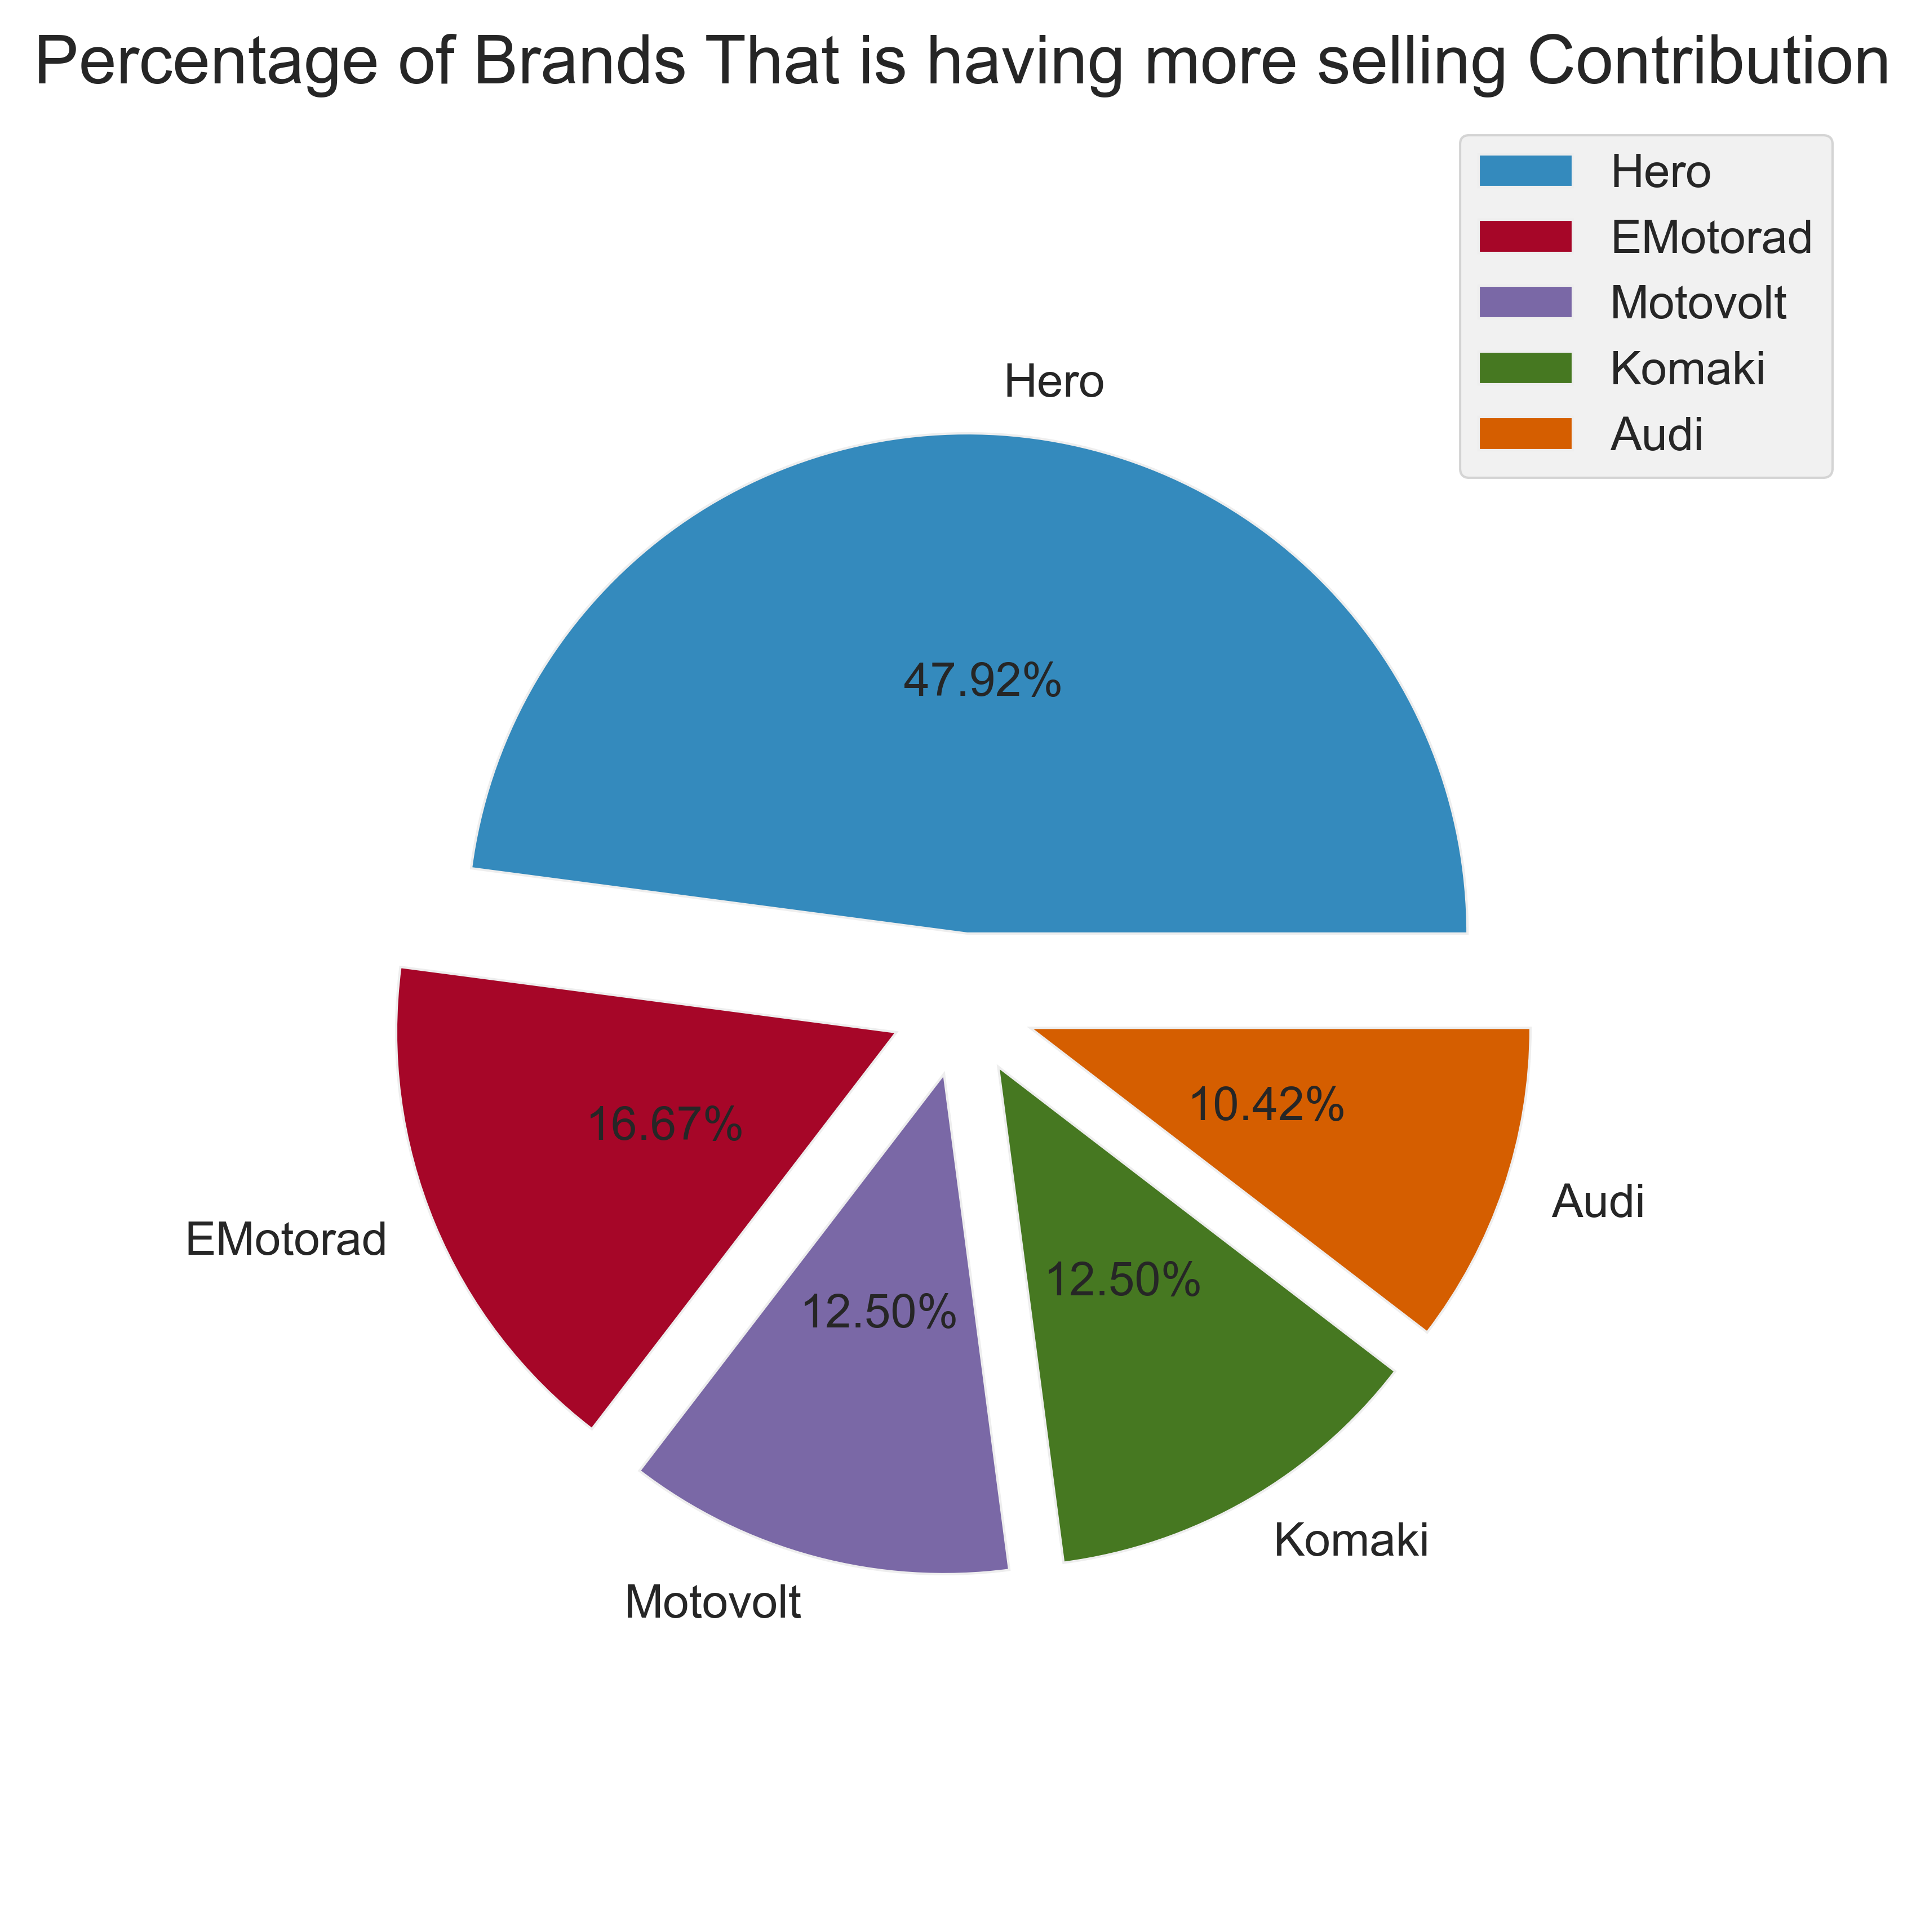

In [158]:
plt.figure(figsize=(7,7), dpi = 300)
explode = (0.1,0.1,0.1,0.1,0.1)
plt.pie(x = dff3.Brand.value_counts().values[0:5],
        labels = dff3.Brand.value_counts().index[0:5], autopct = '%.2f%%', radius = 0.7, pctdistance=0.5,explode =explode)
plt.title('Percentage of Brands That is having more selling Contribution')
plt.legend(loc = 'upper right')
plt.show();

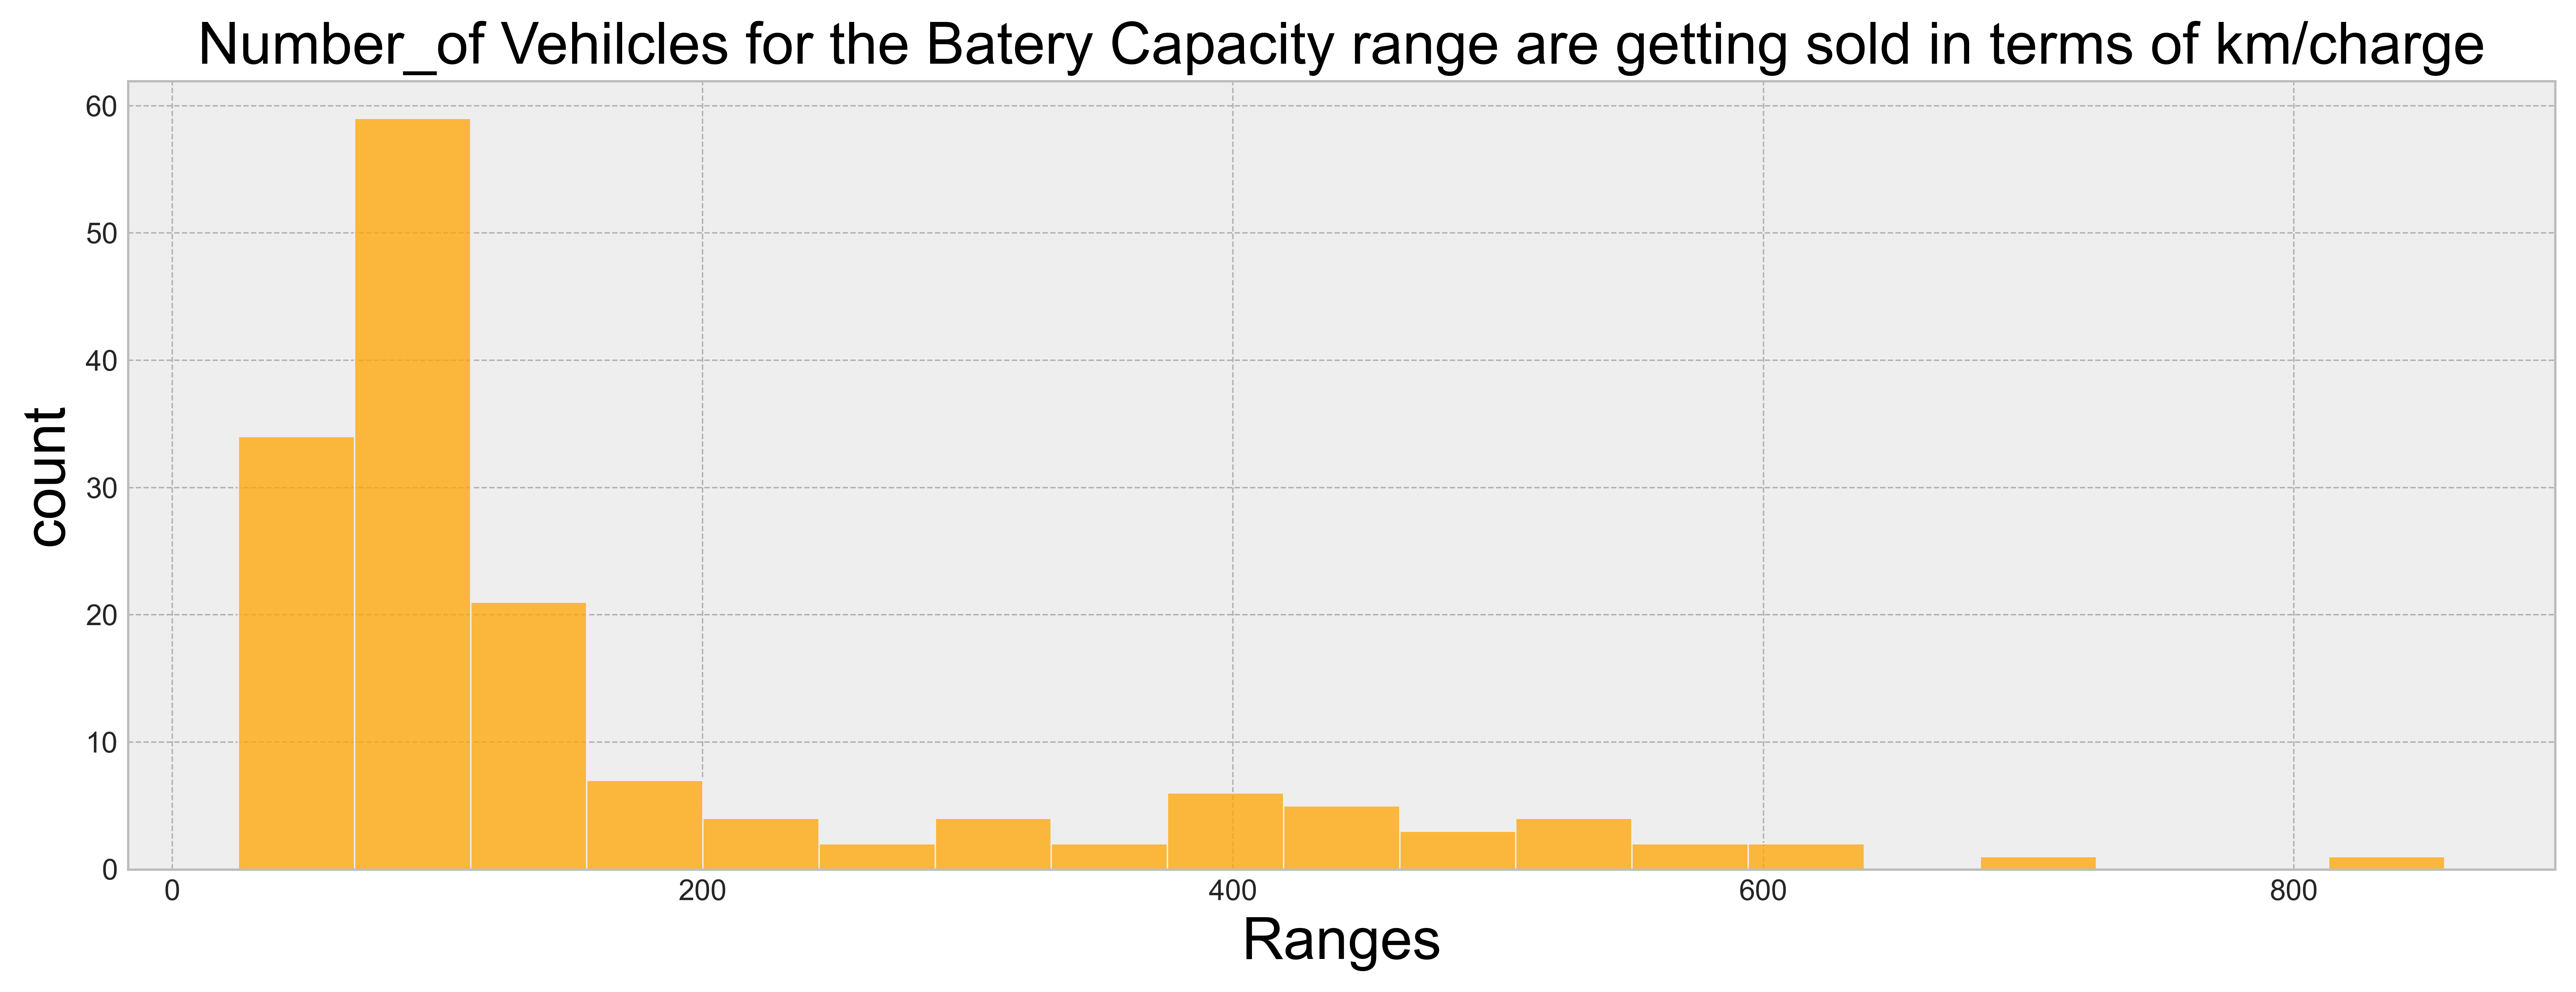

In [159]:
plt.figure(figsize=(15,5), dpi=300)
plt.title('Number_of Vehilcles for the Batery Capacity range are getting sold in terms of km/charge', fontsize=20, color = 'Black')
plt.xlabel('Ranges',fontsize = 20, color = 'black')
plt.ylabel('count',fontsize = 20, color = 'black')
sns.histplot( x ='Ranges', data = dff3, color = 'orange');

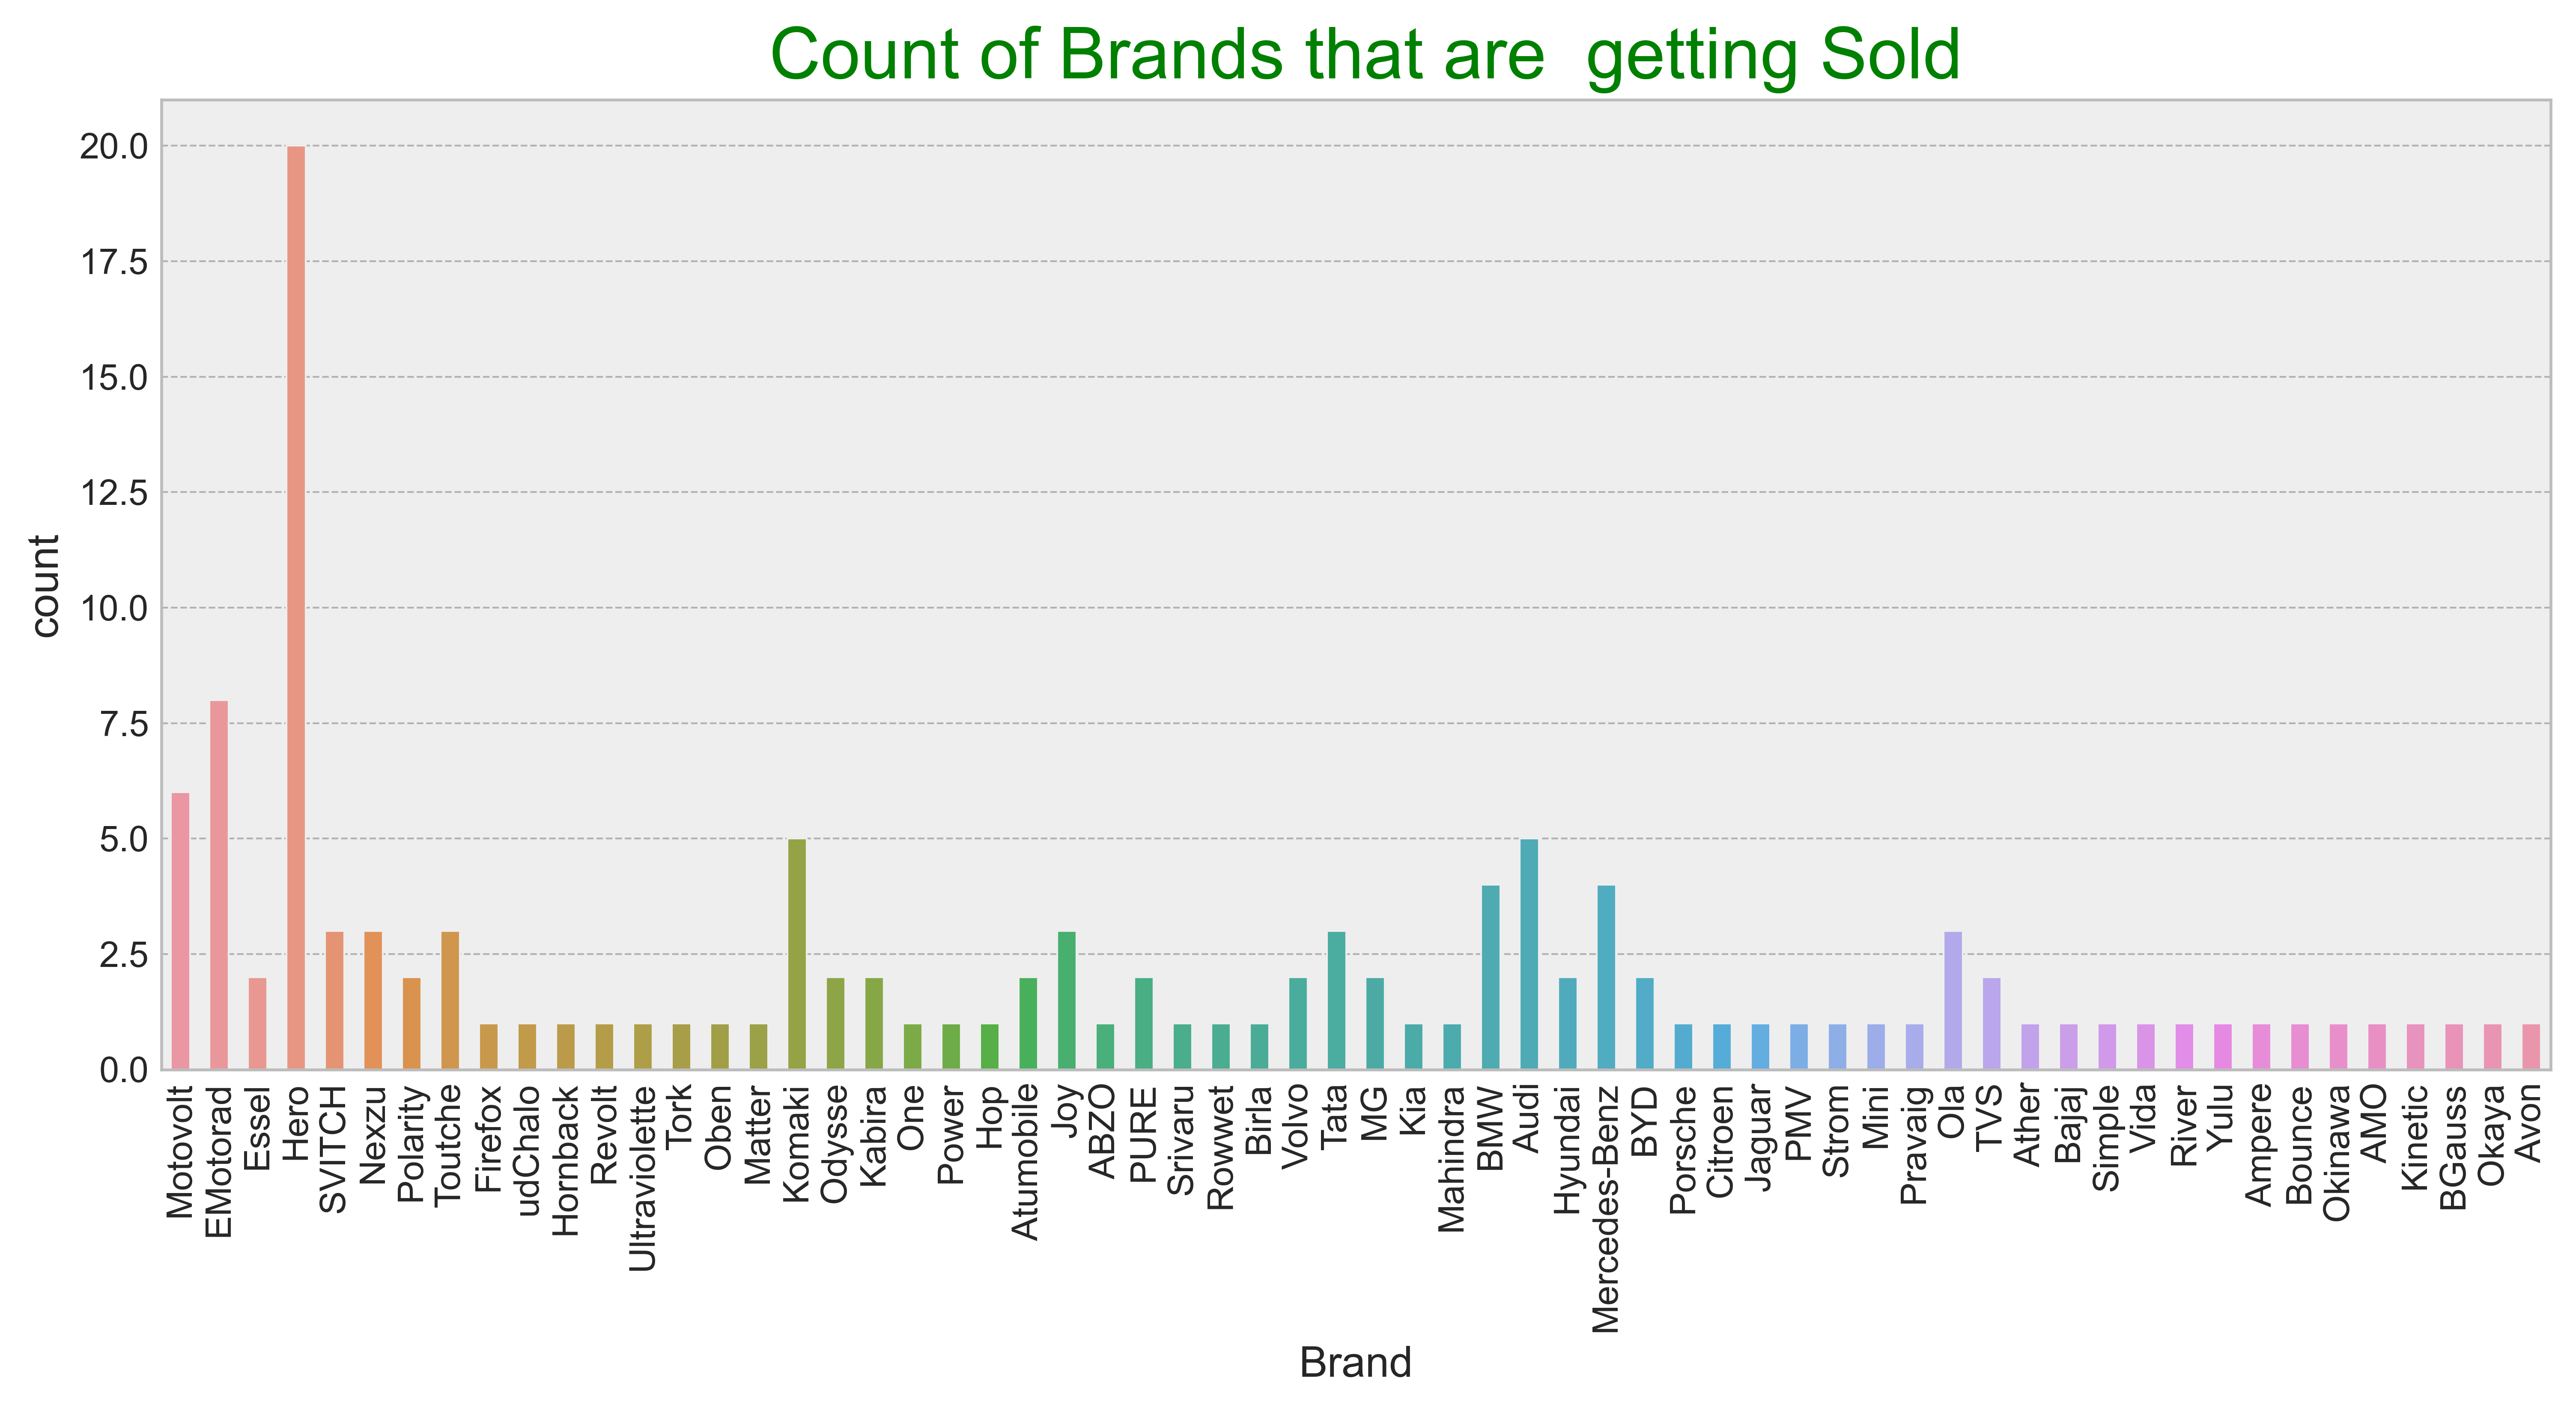

In [160]:
plt.figure(figsize=(12,5), dpi = 300)
plt.title(' Count of Brands that are  getting Sold', color = 'Green',fontsize=20)
plt.xticks(rotation = 90)
sns.countplot(x=dff3.Brand[0:130], width = 0.5);


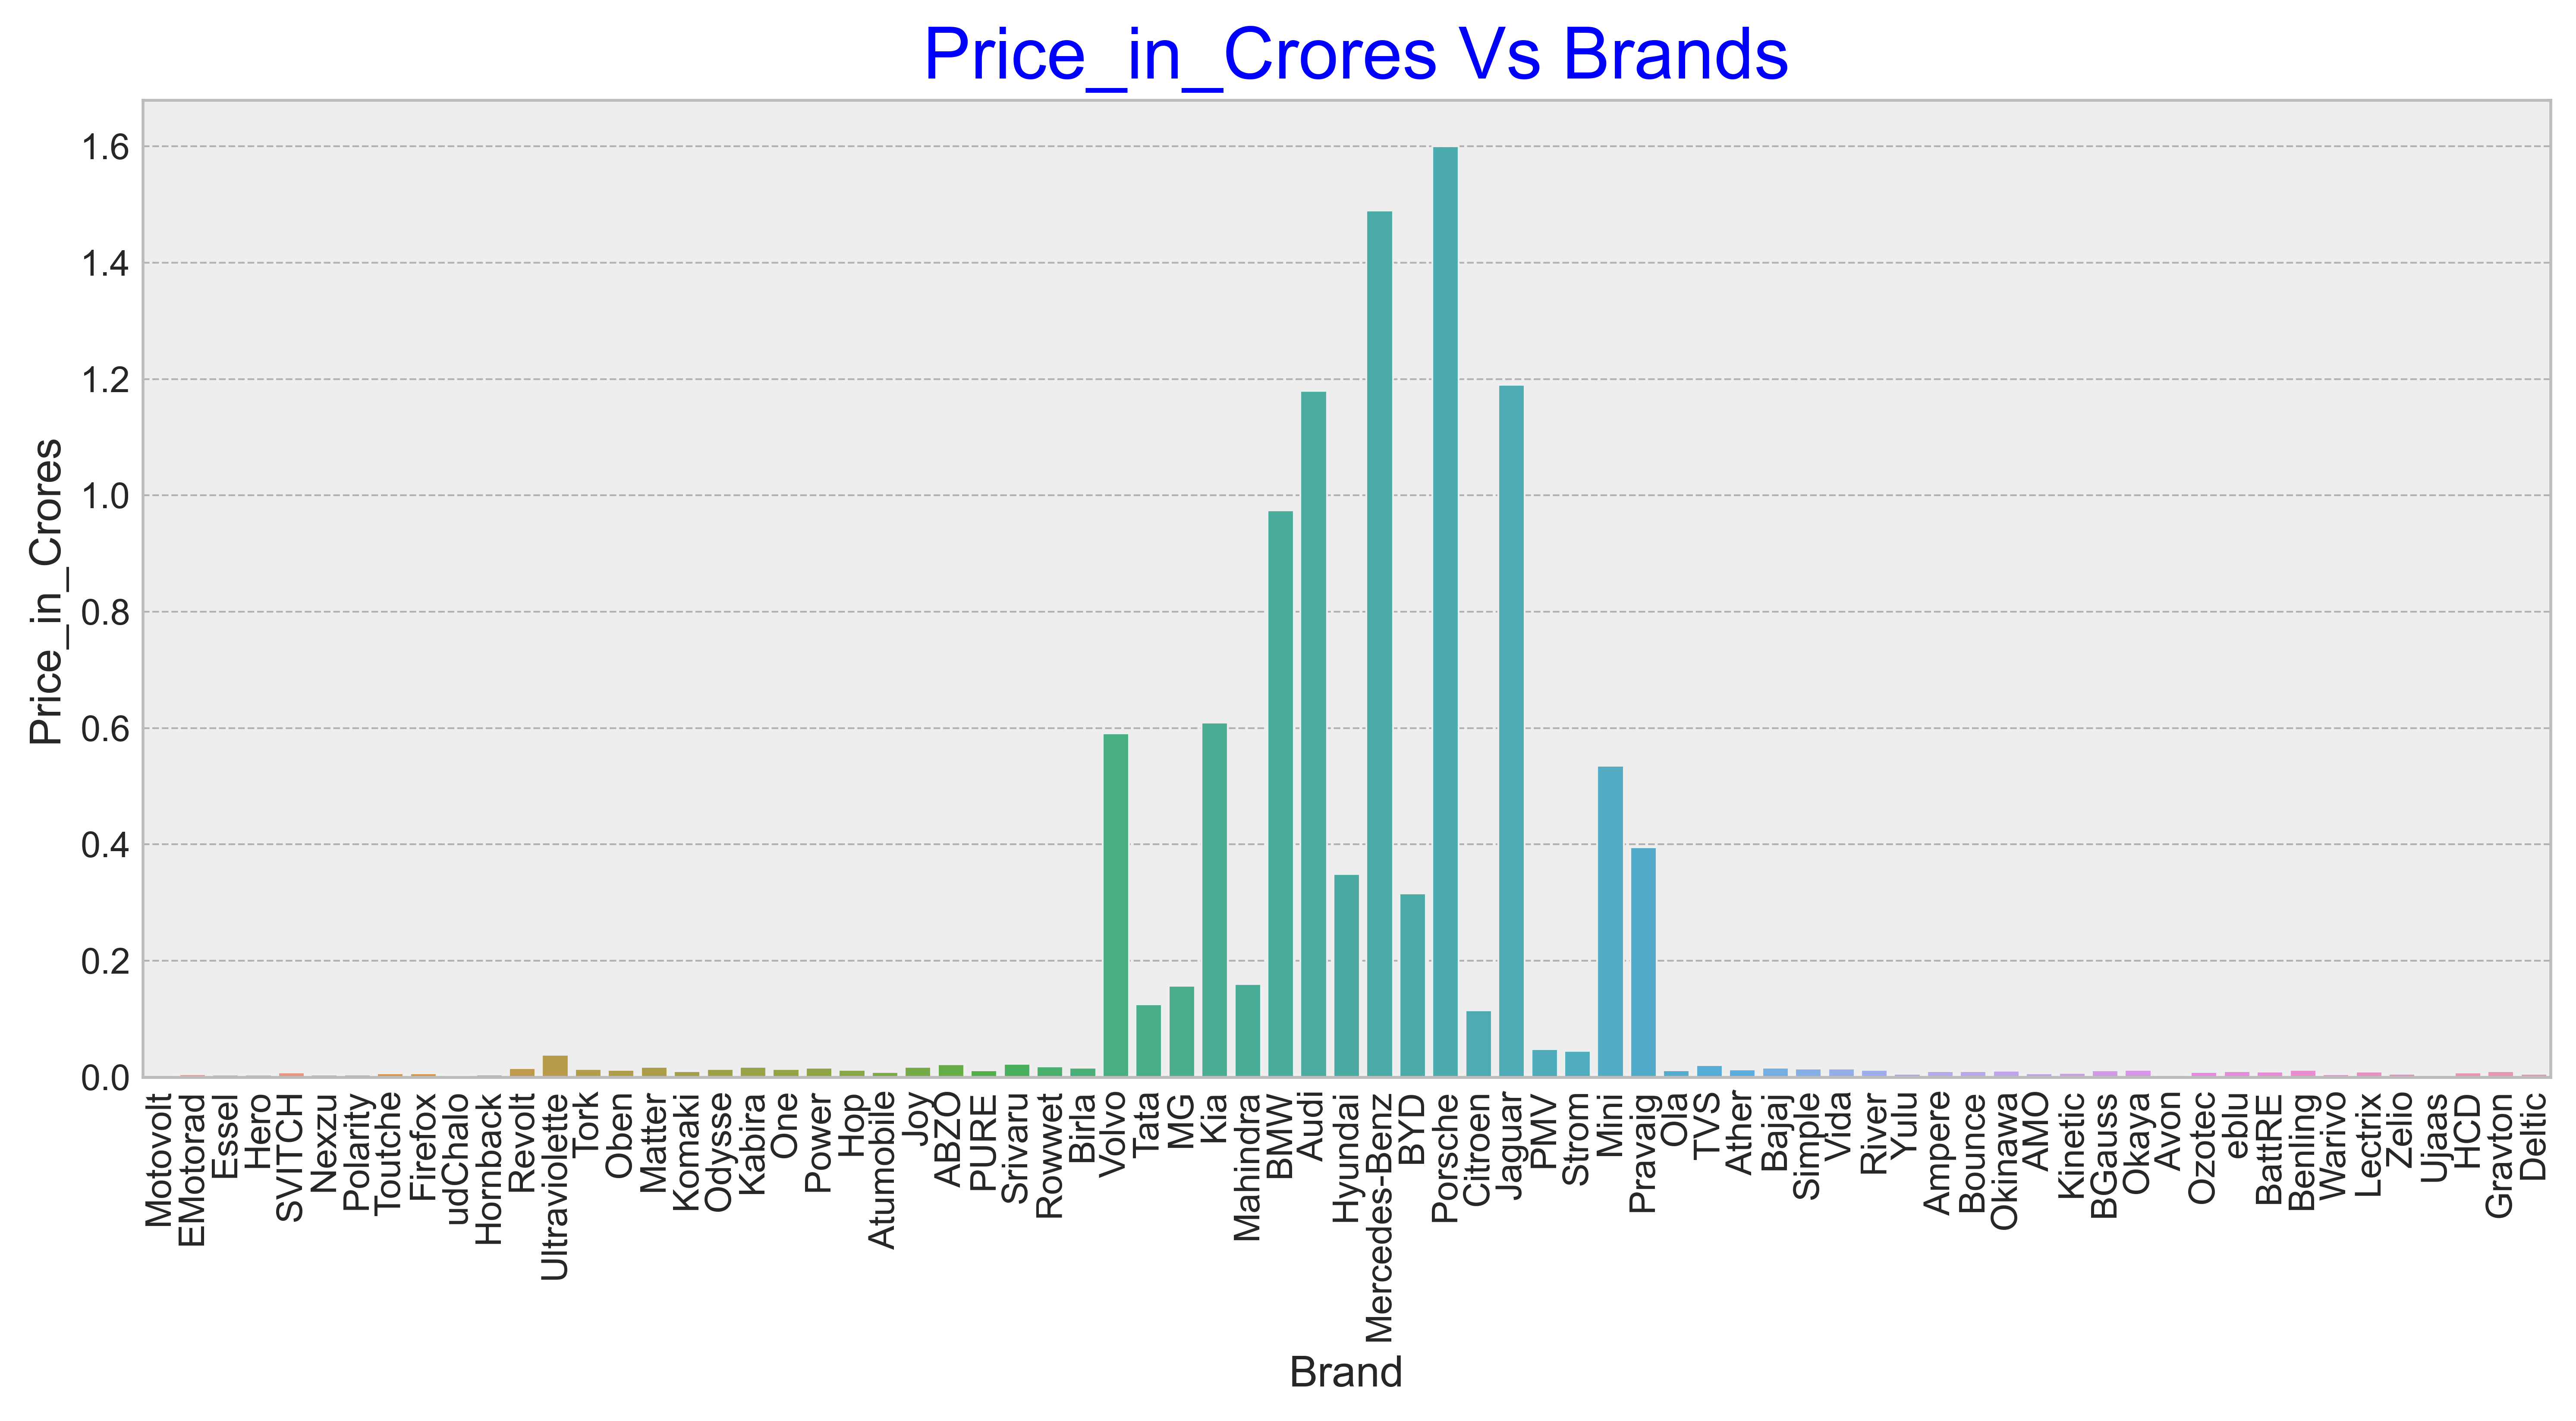

In [161]:
plt.figure(figsize=(12,5), dpi = 300)
plt.title(' Price_in_Crores Vs Brands', color = 'blue',fontsize=20)
plt.xticks(rotation = 90)
sns.barplot(y=dff3.Price_in_Crores, x= dff3.Brand, ci= False, estimator='median' );

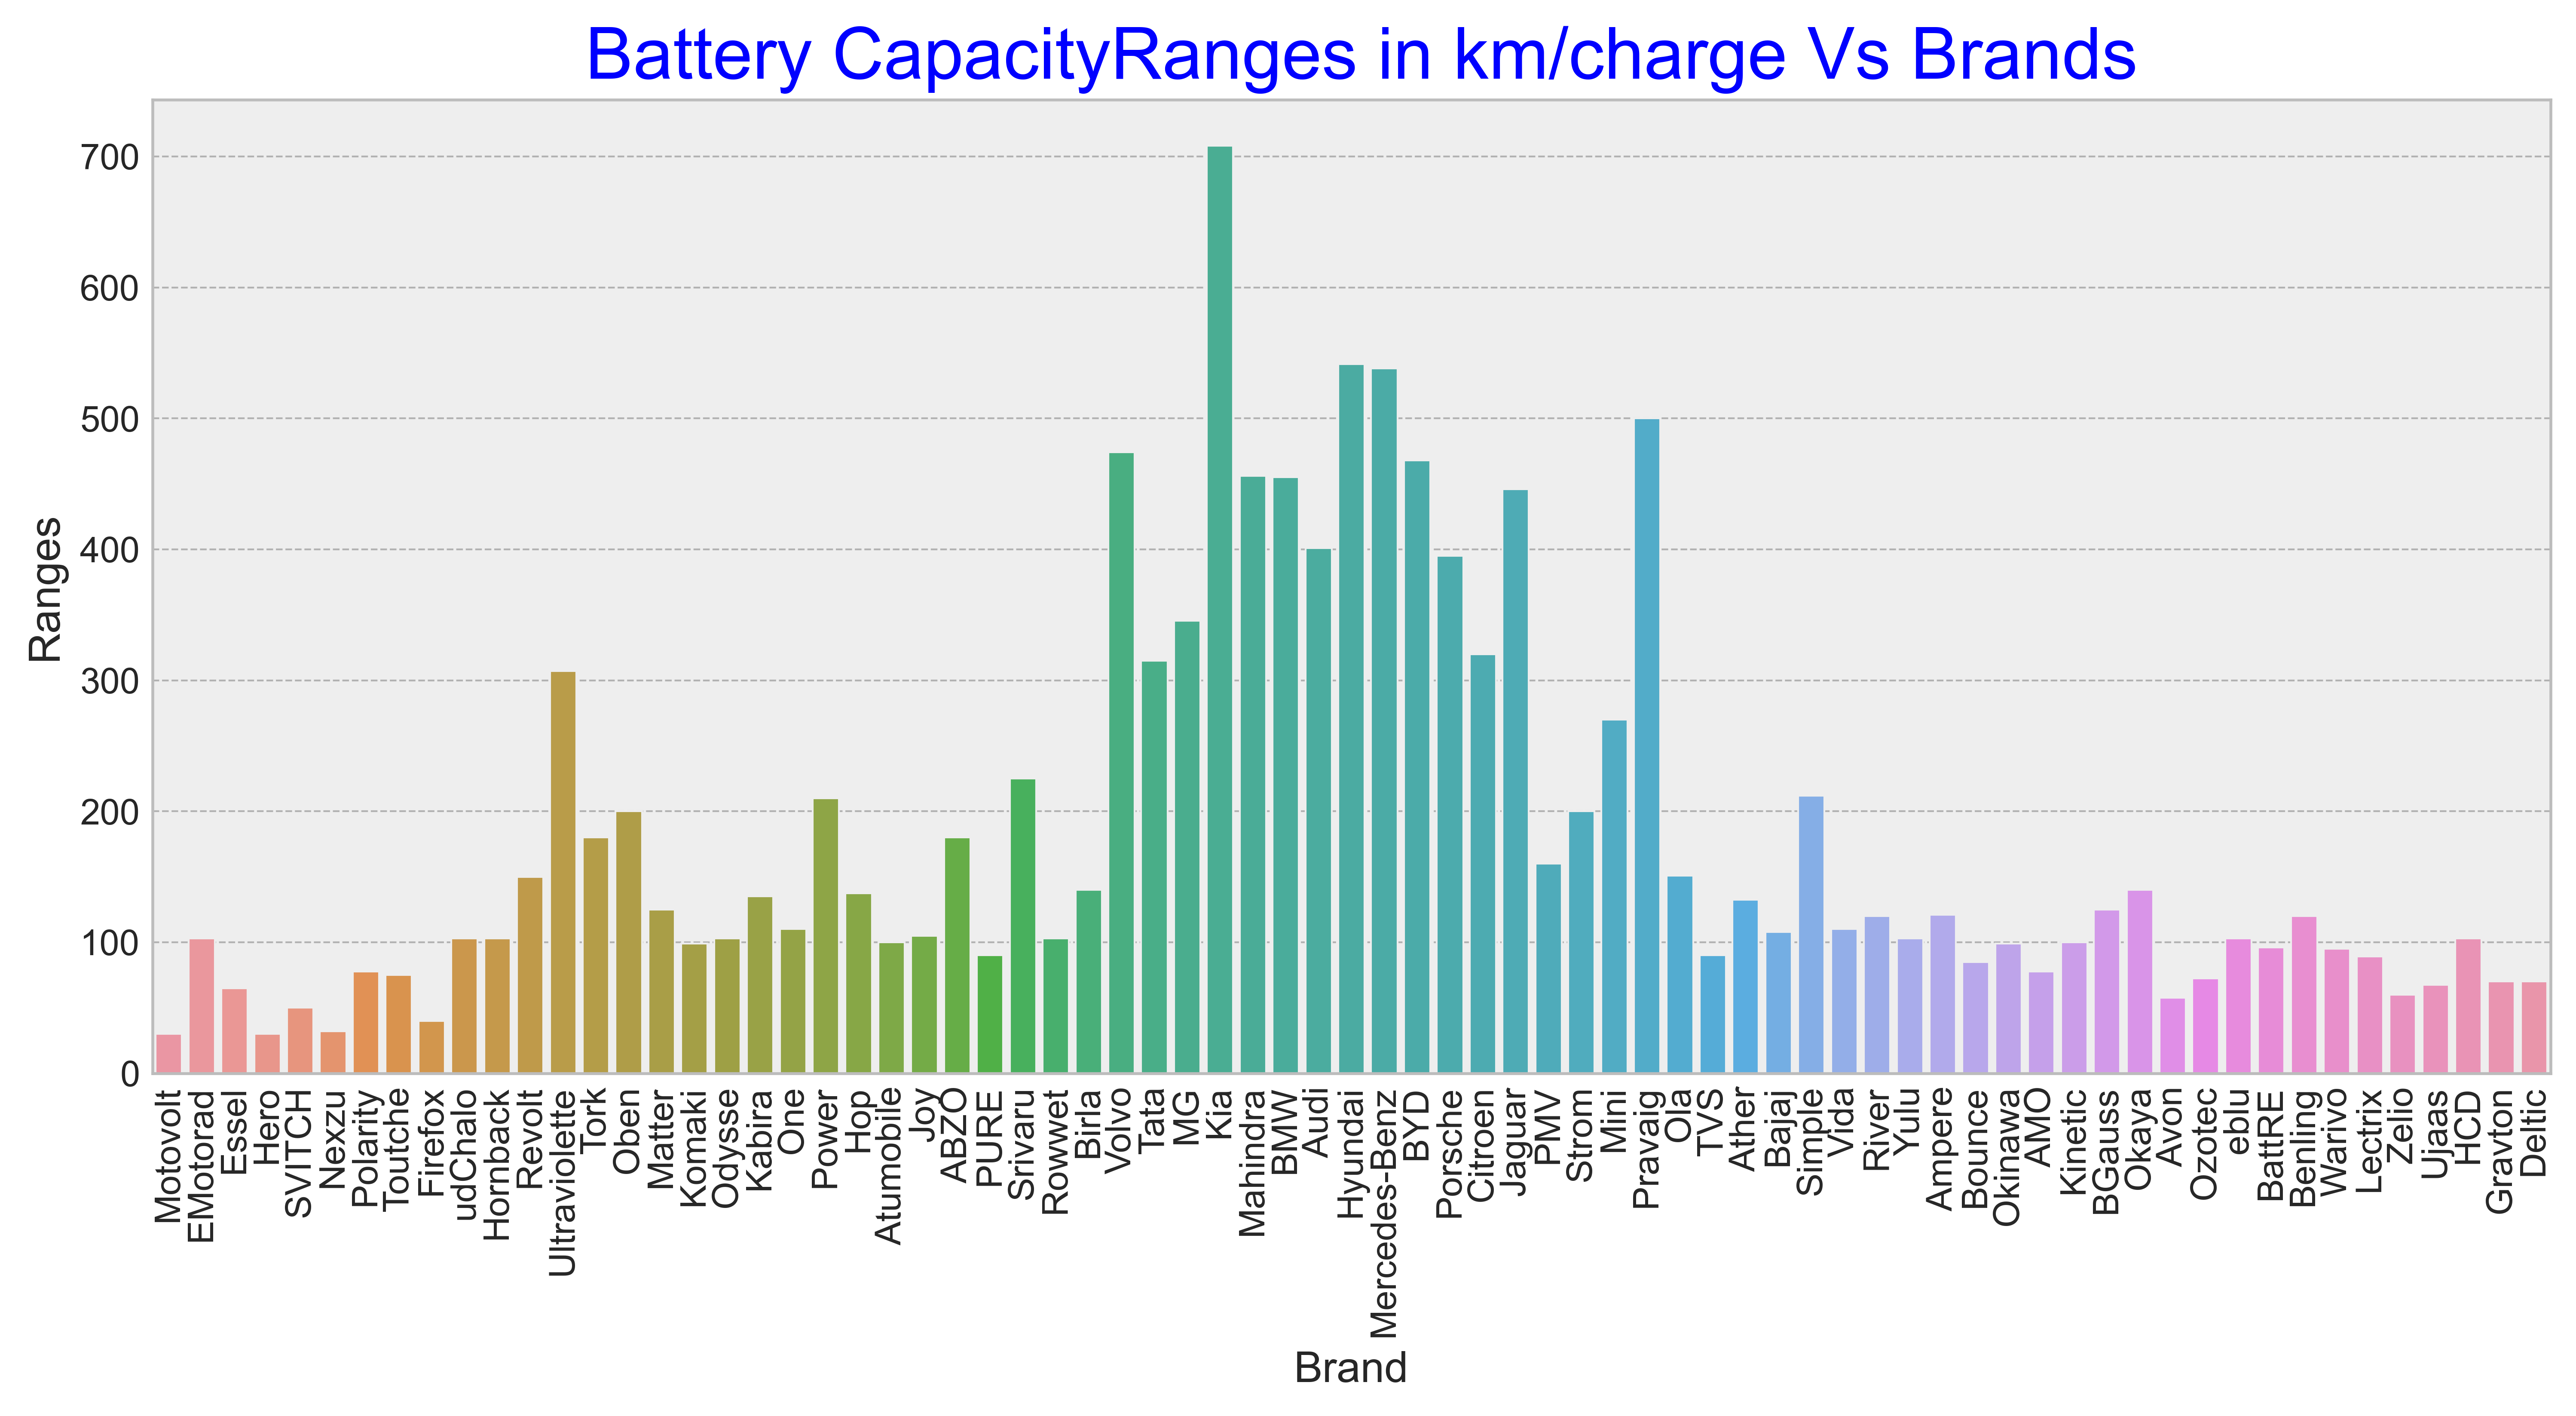

In [162]:
plt.figure(figsize=(12,5), dpi = 300)
plt.title(' Battery CapacityRanges in km/charge Vs Brands', color = 'blue',fontsize=20)
plt.xticks(rotation = 90)
sns.barplot(y=dff3.Ranges, x= dff3.Brand, ci= False, estimator='median' );

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


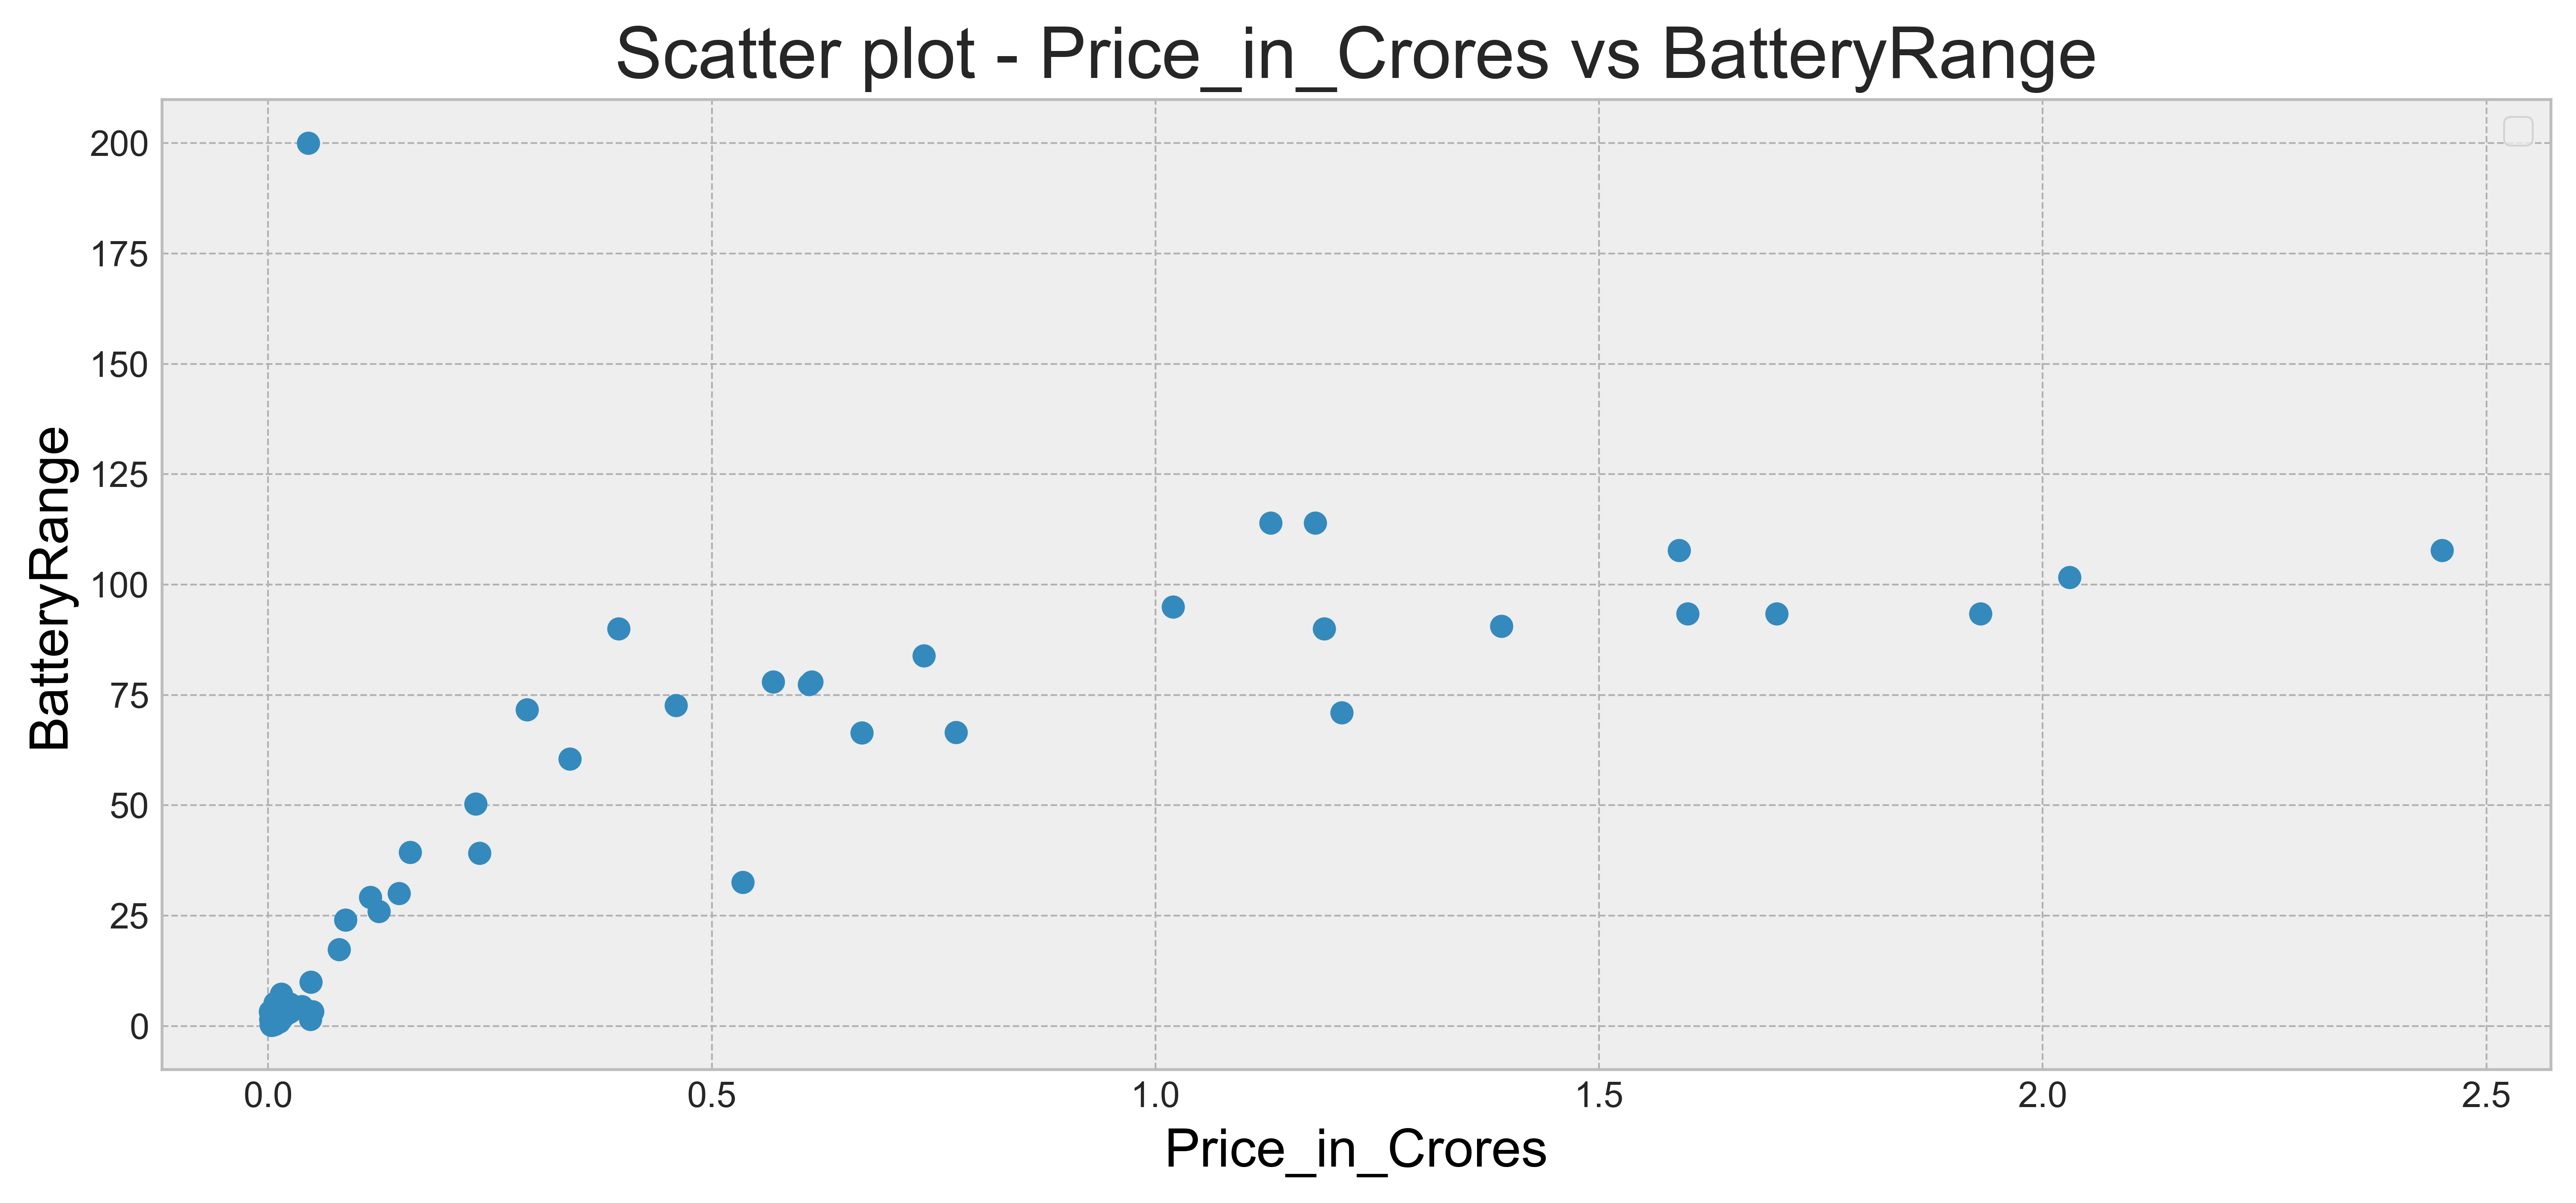

In [163]:
plt.figure(figsize=(12,5), dpi = 300)
plt.scatter(dff3.Price_in_Crores, dff3.BatteryRange)

plt.title('Scatter plot - Price_in_Crores vs BatteryRange', fontsize=20)

plt.xlabel('Price_in_Crores',fontsize = 15, color = 'black')
plt.ylabel('BatteryRange',fontsize = 15, color = 'black')
plt.legend()
plt.show();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


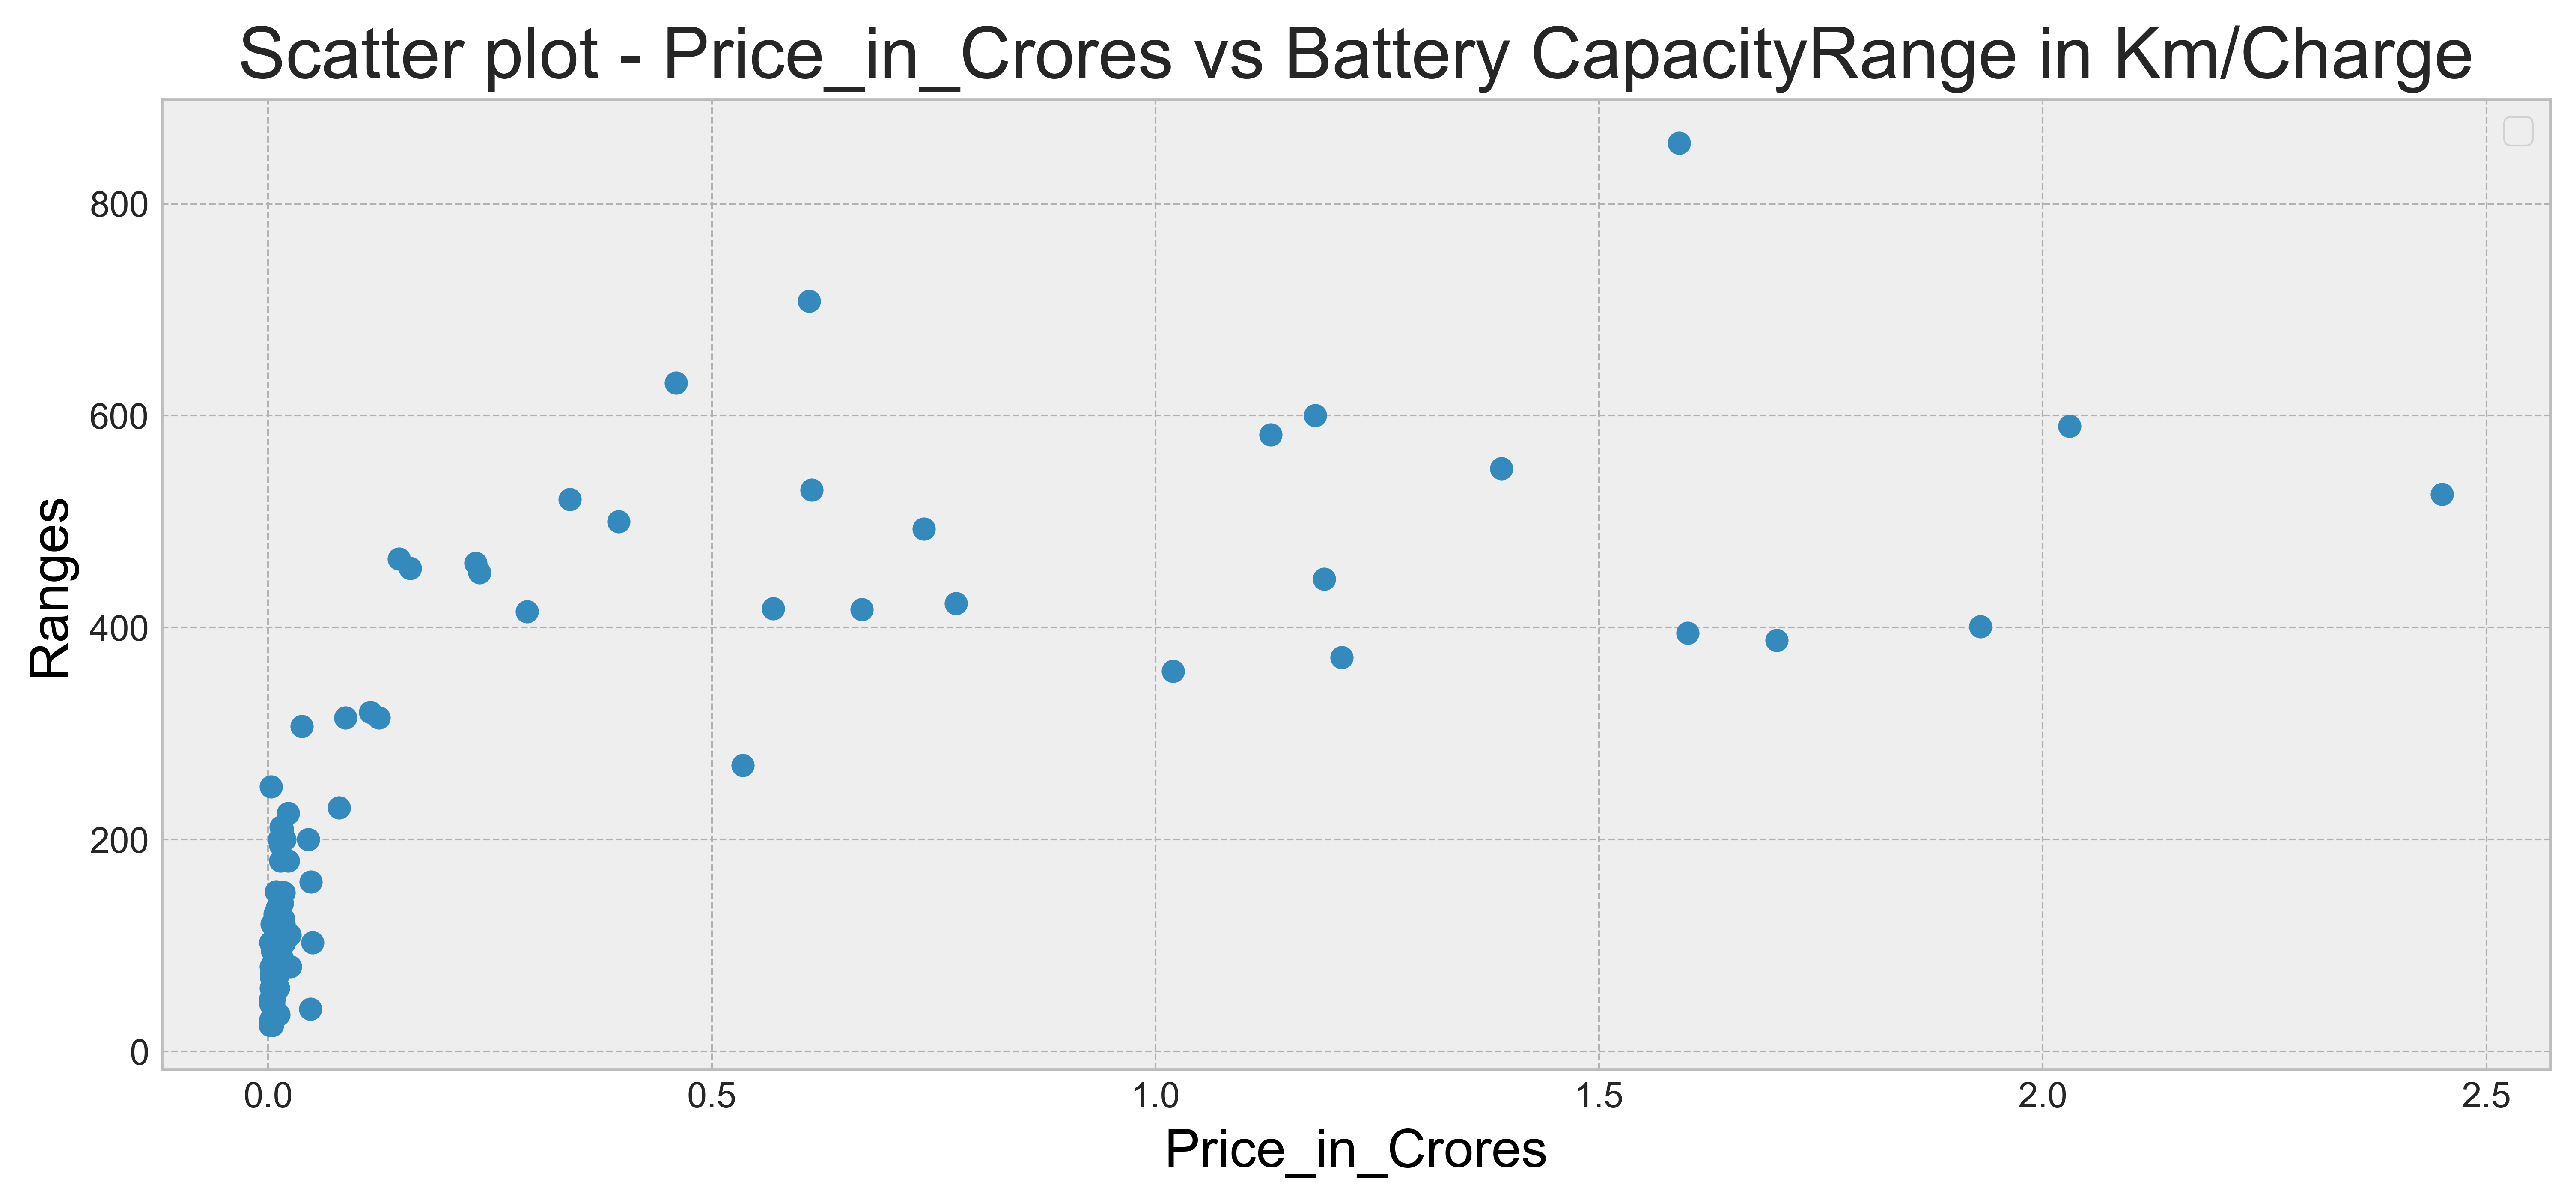

In [164]:
plt.figure(figsize=(12,5), dpi = 300)
plt.scatter(dff3.Price_in_Crores, dff3.Ranges)

plt.title('Scatter plot - Price_in_Crores vs Battery CapacityRange in Km/Charge', fontsize=20)

plt.xlabel('Price_in_Crores',fontsize = 15, color = 'black')
plt.ylabel('Ranges',fontsize = 15, color = 'black')
plt.legend()
plt.show();

<Figure size 4800x2400 with 0 Axes>

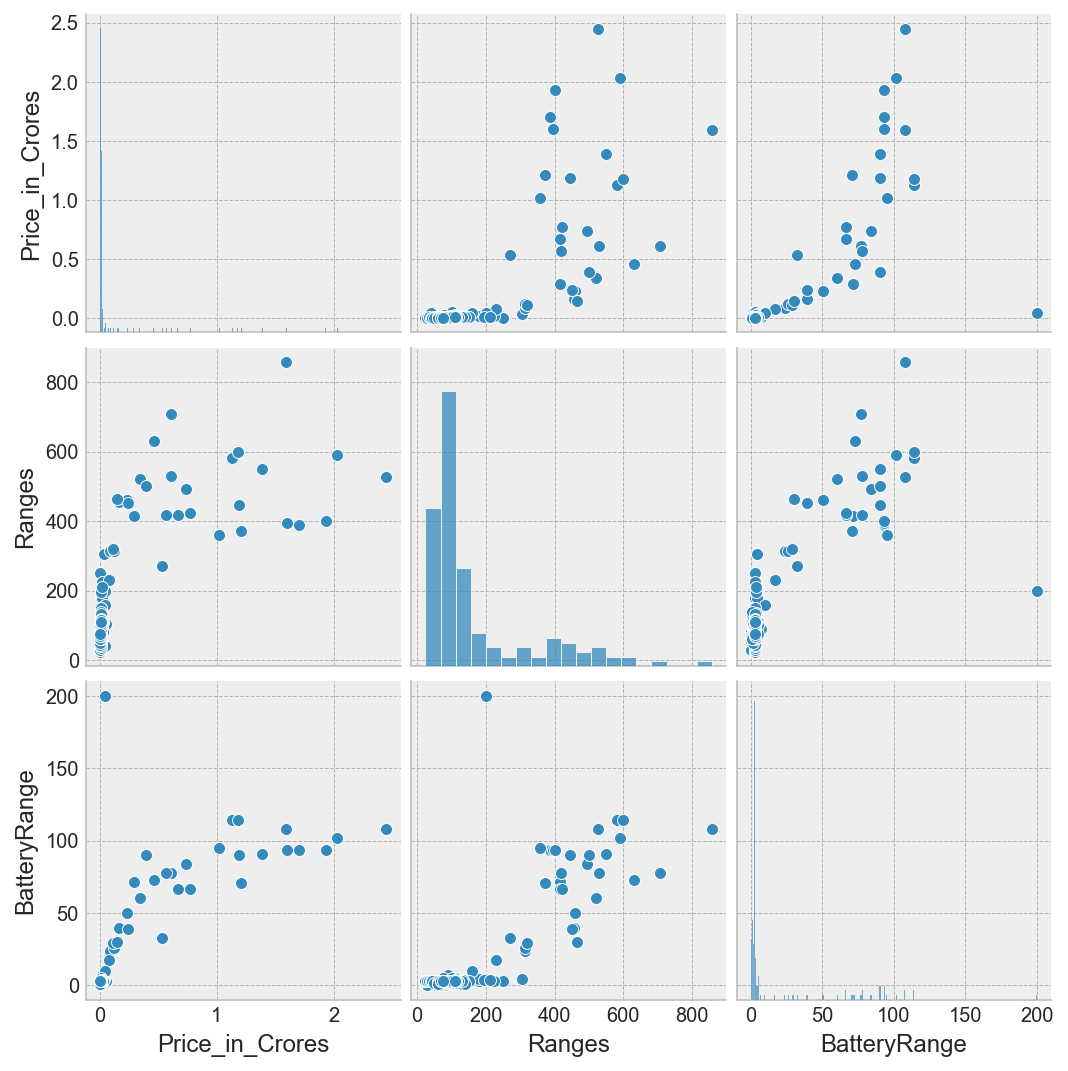

In [165]:
plt.figure(figsize=(16,8), dpi= 300)
sns.pairplot(dff3)
plt.show();